In [ ]:
import xarray as xr
import dask.array as da
import matplotlib.pyplot as plt

def process_nc_file(filename):
    # Use dask to load the data in chunks
    chunks = {'time': 50, 'model_level_number': 5, 'grid_latitude': 10, 'grid_longitude': 10}
    ds = xr.open_dataset(filename, chunks=chunks)

    # Extract the variable and time data from the dataset
    variable_name = filename.split('/')[-1].split('_')[1:-1]
    variable_data = ds['_'.join(variable_name)]
    variable_data_mean = variable_data.mean(dim=['grid_latitude', 'grid_longitude']).sel(model_level_number=3)
    print(f'variable_data_mean ({variable_name}):', variable_data_mean)
    time_data = ds['time']

    # Compute the value of the mean
    variable_data_mean_value = variable_data_mean.compute()
    time_data_value = time_data.compute()

    # Print the value of the mean
    print(f'The mean of variable_data ({variable_name}) is:', variable_data_mean_value)

    # Convert the time data to a dask array
    time = da.from_array(ds['time'], chunks=chunks['time'])

    return variable_data_mean_value, time_data_value

def process_nc_files(filenames):
    variable_data_mean_values = []
    time_data_values = []

    for filename in filenames:
        variable_data_mean_value, time_data_value = process_nc_file(filename)
        variable_data_mean_values.append(variable_data_mean_value)
        time_data_values.append(time_data_value)

    return variable_data_mean_values, time_data_values


variable_data_mean (['number', 'of', 'particles', 'per', 'air', 'molecule', 'of', 'insoluble', 'aitken', 'mode', 'aerosol', 'in', 'air']): <xarray.DataArray 'number_of_particles_per_air_molecule_of_insoluble_aitken_mode_aerosol_in_air' (
                                                                                                  time: 180)>
dask.array<getitem, shape=(180,), dtype=float64, chunksize=(50,), chunktype=numpy.ndarray>
Coordinates:
  * time                (time) datetime64[ns] 2014-07-20T01:00:00 ... 2014-08...
    model_level_number  int64 3
    forecast_period     (time) timedelta64[ns] dask.array<chunksize=(50,), meta=np.ndarray>
    level_height        float64 dask.array<chunksize=(), meta=np.ndarray>
    sigma               float64 dask.array<chunksize=(), meta=np.ndarray>
The mean of variable_data (['number', 'of', 'particles', 'per', 'air', 'molecule', 'of', 'insoluble', 'aitken', 'mode', 'aerosol', 'in', 'air']) is: <xarray.DataArray 'number_of_particles_per_air

/jet/home/ding0928/.conda/envs/iris_3.9_vscode/lib/python3.9/site-packages/dask/array/core.py:3461: UserWarning: Passing an object to dask.array.from_array which is already a Dask collection. This can lead to unexpected behavior.
  warnings.warn(


variable_data_mean (['number', 'of', 'particles', 'per', 'air', 'molecule', 'of', 'soluble', 'accumulation', 'mode', 'aerosol', 'in', 'air']): <xarray.DataArray 'number_of_particles_per_air_molecule_of_soluble_accumulation_mode_aerosol_in_air' (
                                                                                                      time: 180)>
dask.array<getitem, shape=(180,), dtype=float64, chunksize=(50,), chunktype=numpy.ndarray>
Coordinates:
  * time                (time) datetime64[ns] 2014-07-20T01:00:00 ... 2014-08...
    model_level_number  int64 3
    forecast_period     (time) timedelta64[ns] dask.array<chunksize=(50,), meta=np.ndarray>
    level_height        float64 dask.array<chunksize=(), meta=np.ndarray>
    sigma               float64 dask.array<chunksize=(), meta=np.ndarray>
The mean of variable_data (['number', 'of', 'particles', 'per', 'air', 'molecule', 'of', 'soluble', 'accumulation', 'mode', 'aerosol', 'in', 'air']) is: <xarray.DataArray 'number_of_p

/jet/home/ding0928/.conda/envs/iris_3.9_vscode/lib/python3.9/site-packages/dask/array/core.py:3461: UserWarning: Passing an object to dask.array.from_array which is already a Dask collection. This can lead to unexpected behavior.
  warnings.warn(


variable_data_mean (['number', 'of', 'particles', 'per', 'air', 'molecule', 'of', 'soluble', 'aitken', 'mode', 'aerosol', 'in', 'air']): <xarray.DataArray 'number_of_particles_per_air_molecule_of_soluble_aitken_mode_aerosol_in_air' (
                                                                                                time: 180)>
dask.array<getitem, shape=(180,), dtype=float64, chunksize=(50,), chunktype=numpy.ndarray>
Coordinates:
  * time                (time) datetime64[ns] 2014-07-20T01:00:00 ... 2014-08...
    model_level_number  int64 3
    forecast_period     (time) timedelta64[ns] dask.array<chunksize=(50,), meta=np.ndarray>
    level_height        float64 dask.array<chunksize=(), meta=np.ndarray>
    sigma               float64 dask.array<chunksize=(), meta=np.ndarray>
The mean of variable_data (['number', 'of', 'particles', 'per', 'air', 'molecule', 'of', 'soluble', 'aitken', 'mode', 'aerosol', 'in', 'air']) is: <xarray.DataArray 'number_of_particles_per_air_molecul

/jet/home/ding0928/.conda/envs/iris_3.9_vscode/lib/python3.9/site-packages/dask/array/core.py:3461: UserWarning: Passing an object to dask.array.from_array which is already a Dask collection. This can lead to unexpected behavior.
  warnings.warn(


The mean of variable_data (['number', 'of', 'particles', 'per', 'air', 'molecule', 'of', 'soluble', 'coarse', 'mode', 'aerosol', 'in', 'air']) is: <xarray.DataArray 'number_of_particles_per_air_molecule_of_soluble_coarse_mode_aerosol_in_air' (
                                                                                                time: 180)>
array([5.27893134e-21, 4.95417681e-21, 4.90869313e-21, 4.86744273e-21,
       4.85167025e-21, 5.17609210e-21, 5.58085638e-21, 5.13906190e-21,
       4.32592265e-21, 3.86295624e-21, 3.75242279e-21, 3.75858767e-21,
       3.97668486e-21, 4.94896384e-21, 5.77313516e-21, 5.72920019e-21,
       5.81265811e-21, 5.70223637e-21, 5.78567930e-21, 5.86617989e-21,
       5.91908208e-21, 6.11805484e-21, 6.18661695e-21, 5.76595035e-21,
       5.33784969e-21, 5.06974631e-21, 4.81279452e-21, 4.63211797e-21,
       4.54062742e-21, 5.04968178e-21, 5.42374047e-21, 4.86023527e-21,
       4.62039826e-21, 4.61995226e-21, 4.72391443e-21, 4.85709804e-21,
       4.

/jet/home/ding0928/.conda/envs/iris_3.9_vscode/lib/python3.9/site-packages/dask/array/core.py:3461: UserWarning: Passing an object to dask.array.from_array which is already a Dask collection. This can lead to unexpected behavior.
  warnings.warn(


The mean of variable_data (['number', 'of', 'particles', 'per', 'air', 'molecule', 'of', 'soluble', 'nucleation', 'mode', 'aerosol', 'in', 'air']) is: <xarray.DataArray 'number_of_particles_per_air_molecule_of_soluble_nucleation_mode_aerosol_in_air' (
                                                                                                    time: 180)>
array([1.05217321e-18, 2.58458442e-19, 2.07033841e-19, 9.93863513e-20,
       6.06497738e-20, 7.58394114e-20, 3.60492223e-19, 1.25945678e-18,
       9.28843767e-19, 4.05633189e-19, 1.95072715e-19, 1.04636635e-19,
       6.81841684e-20, 5.03238942e-20, 2.48526290e-19, 8.51467914e-19,
       3.95890301e-19, 5.35664932e-20, 4.04222076e-20, 3.68240981e-20,
       2.49417724e-20, 6.39420421e-20, 2.74763108e-19, 2.03997565e-18,
       3.11061860e-18, 9.14159024e-19, 7.56077164e-19, 4.54395666e-19,
       2.85835578e-19, 2.65927510e-19, 1.29821981e-18, 2.20439149e-18,
       9.54273244e-19, 2.99856546e-19, 2.37480352e-19, 1.81195949e-1

/jet/home/ding0928/.conda/envs/iris_3.9_vscode/lib/python3.9/site-packages/dask/array/core.py:3461: UserWarning: Passing an object to dask.array.from_array which is already a Dask collection. This can lead to unexpected behavior.
  warnings.warn(


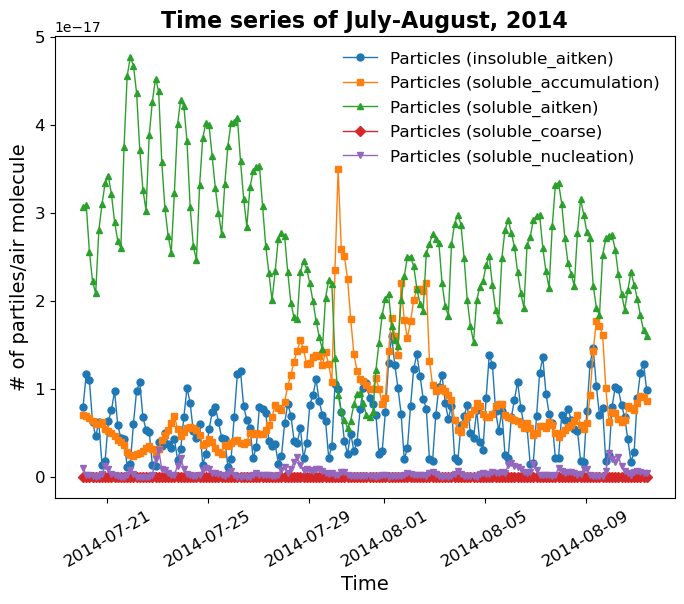

In [ ]:
def plot_data(time_data_values, variable_data_mean_values, filenames):
    fig, ax = plt.subplots(figsize=(8,6))
    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
    markers = ['o', 's', '^', 'D', 'v']
    
    labels = []
    for filename in filenames:
        variable_name = filename.split('/')[-1].split('_')[8:10]
        variable_name = '_'.join(variable_name)
        label = filename.split('/')[-1].split('_')[3].capitalize() + ' (' + variable_name + ')'
        labels.append(label)

    for i, (time_data_value, variable_data_mean_value) in enumerate(zip(time_data_values, variable_data_mean_values)):
        ax.plot(time_data_value, variable_data_mean_value, label=labels[i], color=colors[i], marker=markers[i], markersize=5, linewidth=1)

    ax.set_xlabel('Time', fontsize=14)
    ax.set_ylabel('# of partiles/air molecule', fontsize=14)
    ax.set_title('Time series of July-August, 2014', fontsize=16, fontweight='bold')
    ax.tick_params(axis='both', labelsize=12)
    ax.legend(labels=labels, fontsize=12, frameon=False)
    plt.xticks(rotation=30)
    plt.show()


# Example usage:
path = "/ocean/projects/atm200005p/ding0928/nc_file_full/u-ct706/full_nc_files/"
filenames = [path+'Rgn_number_of_particles_per_air_molecule_of_insoluble_aitken_mode_aerosol_in_air_m01s34i119.nc',
             path+'Rgn_number_of_particles_per_air_molecule_of_soluble_accumulation_mode_aerosol_in_air_m01s34i107.nc',
             path+'Rgn_number_of_particles_per_air_molecule_of_soluble_aitken_mode_aerosol_in_air_m01s34i103.nc',
             path+'Rgn_number_of_particles_per_air_molecule_of_soluble_coarse_mode_aerosol_in_air_m01s34i113.nc',
             path+'Rgn_number_of_particles_per_air_molecule_of_soluble_nucleation_mode_aerosol_in_air_m01s34i101.nc']

variable_data_mean_values, time_data_values = process_nc_files(filenames)

plot_data(time_data_values, variable_data_mean_values, filenames)


In [ ]:
# the third cell is to include the unit-conversion part, which is built upon the previous cell;
# and it's working perfectly fine!!!

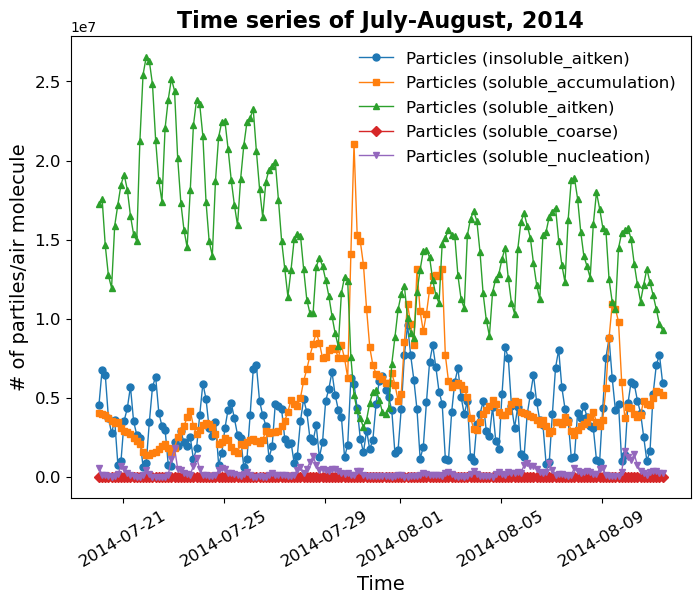

In [ ]:
import xarray as xr
import dask.array as da
import matplotlib.pyplot as plt
import os

def read_pt_data(potential_temperature_file, air_pressure_file):
    chunks = {'time': 20, 'model_level_number': 5, 'grid_latitude': 10, 'grid_longitude': 10}
    
    ds_theta = xr.open_dataset(potential_temperature_file, chunks=chunks)
    ds_p = xr.open_dataset(air_pressure_file, chunks=chunks)

    potential_temperature = ds_theta['air_potential_temperature']
    air_pressure = ds_p['air_pressure']
    
    return potential_temperature, air_pressure

def convert_theta_to_temperature(potential_temperature, air_pressure):
    Rd_cp = 287.05 / 1004.0
    temperature = potential_temperature * (air_pressure / 100000.0) ** Rd_cp
    return temperature

def mixing_ratio_to_number_concentration(mixing_ratio_data, air_pressure, actual_temperature):
    R = 287.0
    Na = 6.022e23
    air_density = air_pressure / (R * actual_temperature)
    number_concentration = mixing_ratio_data * air_density * Na
    return number_concentration

def process_nc_file(filename, air_pressure, actual_temperature):
    chunks = {'time': 20, 'model_level_number': 5, 'grid_latitude': 10, 'grid_longitude': 10}
    ds = xr.open_dataset(filename, chunks=chunks)
    variable_name = filename.split('/')[-1].split('_')[1:-1]
    variable_data = ds['_'.join(variable_name)]
    number_concentration_data = mixing_ratio_to_number_concentration(variable_data, air_pressure, actual_temperature)
    number_concentration_mean = number_concentration_data.mean(dim=['grid_latitude', 'grid_longitude']).sel(model_level_number=3)
    time_data = ds['time']
    number_concentration_mean_value = number_concentration_mean.compute()
    time_data_value = time_data.compute()
    return number_concentration_mean_value, time_data_value

def process_nc_files(filenames, air_pressure, actual_temperature):
    number_concentration_mean_values = []
    time_data_values = []
    for filename in filenames:
        number_concentration_mean_value, time_data_value = process_nc_file(filename, air_pressure, actual_temperature)
        number_concentration_mean_values.append(number_concentration_mean_value)
        time_data_values.append(time_data_value)
    return number_concentration_mean_values, time_data_values

def plot_data(time_data_values, variable_data_mean_values, filenames):
    fig, ax = plt.subplots(figsize=(8,6))
    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
    markers = ['o', 's', '^', 'D', 'v']
    
    labels = []
    for filename in filenames:
        variable_name = filename.split('/')[-1].split('_')[8:10]
        variable_name = '_'.join(variable_name)
        label = filename.split('/')[-1].split('_')[3].capitalize() + ' (' + variable_name + ')'
        labels.append(label)

    for i, (time_data_value, variable_data_mean_value) in enumerate(zip(time_data_values, variable_data_mean_values)):
        ax.plot(time_data_value, variable_data_mean_value, label=labels[i], color=colors[i], marker=markers[i], markersize=5, linewidth=1)

    ax.set_xlabel('Time', fontsize=14)
    ax.set_ylabel('# of partiles/air molecule', fontsize=14)
    ax.set_title('Time series of July-August, 2014', fontsize=16, fontweight='bold')
    ax.tick_params(axis='both', labelsize=12)
    ax.legend(labels=labels, fontsize=12, frameon=False)
    plt.xticks(rotation=30)
    plt.show()

    
path = "/ocean/projects/atm200005p/ding0928/nc_file_full/u-ct706/full_nc_files/"
filenames = [path+'Rgn_number_of_particles_per_air_molecule_of_insoluble_aitken_mode_aerosol_in_air_m01s34i119.nc',
             path+'Rgn_number_of_particles_per_air_molecule_of_soluble_accumulation_mode_aerosol_in_air_m01s34i107.nc',
             path+'Rgn_number_of_particles_per_air_molecule_of_soluble_aitken_mode_aerosol_in_air_m01s34i103.nc',
             path+'Rgn_number_of_particles_per_air_molecule_of_soluble_coarse_mode_aerosol_in_air_m01s34i113.nc',
             path+'Rgn_number_of_particles_per_air_molecule_of_soluble_nucleation_mode_aerosol_in_air_m01s34i101.nc']

potential_temperature_file = path + 'Rgn_air_potential_temperature_m01s00i004.nc'
air_pressure_file = path + 'Rgn_air_pressure_m01s00i408.nc'

potential_temperature, air_pressure = read_pt_data(potential_temperature_file, air_pressure_file)
actual_temperature = convert_theta_to_temperature(potential_temperature, air_pressure)

number_concentration_mean_values, time_data_values = process_nc_files(filenames, air_pressure, actual_temperature)
plot_data(time_data_values, number_concentration_mean_values, filenames)


IndexError: list index out of range

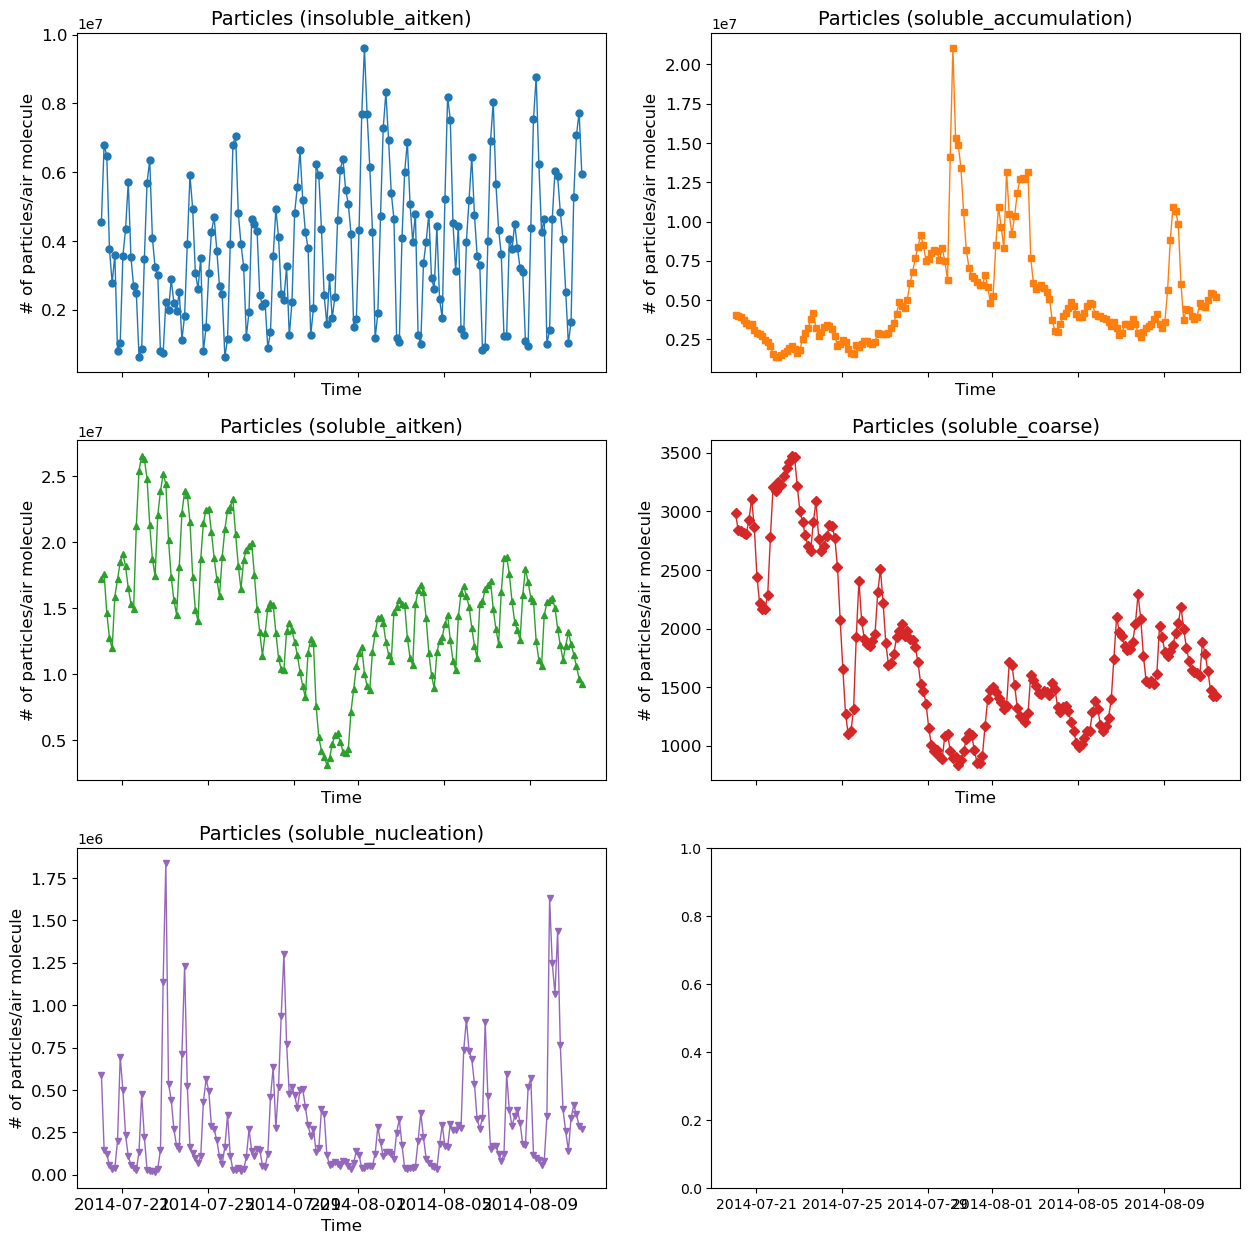

In [ ]:
import xarray as xr
import dask.array as da
import matplotlib.pyplot as plt
import os

def read_pt_data(potential_temperature_file, air_pressure_file):
    chunks = {'time': 20, 'model_level_number': 5, 'grid_latitude': 10, 'grid_longitude': 10}
    
    ds_theta = xr.open_dataset(potential_temperature_file, chunks=chunks)
    ds_p = xr.open_dataset(air_pressure_file, chunks=chunks)

    potential_temperature = ds_theta['air_potential_temperature']
    air_pressure = ds_p['air_pressure']
    
    return potential_temperature, air_pressure

def convert_theta_to_temperature(potential_temperature, air_pressure):
    Rd_cp = 287.05 / 1004.0
    temperature = potential_temperature * (air_pressure / 100000.0) ** Rd_cp
    return temperature
         
def mixing_ratio_to_number_concentration(mixing_ratio_data, air_pressure, actual_temperature):
    R = 287.0
    Na = 6.022e23
    air_density = air_pressure / (R * actual_temperature)
    number_concentration = mixing_ratio_data * air_density * Na
    return number_concentration

def process_nc_file(filename, air_pressure, actual_temperature):
    chunks = {'time': 20, 'model_level_number': 5, 'grid_latitude': 10, 'grid_longitude': 10}
    ds = xr.open_dataset(filename, chunks=chunks)
    variable_name = filename.split('/')[-1].split('_')[1:-1]
    variable_data = ds['_'.join(variable_name)]
    number_concentration_data = mixing_ratio_to_number_concentration(variable_data, air_pressure, actual_temperature)
    number_concentration_mean = number_concentration_data.mean(dim=['grid_latitude', 'grid_longitude']).sel(model_level_number=3)
    time_data = ds['time']
    number_concentration_mean_value = number_concentration_mean.compute()
    time_data_value = time_data.compute()
    return number_concentration_mean_value, time_data_value

def process_nc_files(filenames, air_pressure, actual_temperature):
    number_concentration_mean_values = []
    time_data_values = []
    for filename in filenames:
        number_concentration_mean_value, time_data_value = process_nc_file(filename, air_pressure, actual_temperature)
        number_concentration_mean_values.append(number_concentration_mean_value)
        time_data_values.append(time_data_value)
    return number_concentration_mean_values, time_data_values

# Updated plot_data function
def plot_data(time_data_values, number_concentration_mean_values, filenames):
    fig, axes = plt.subplots(3, 2, figsize=(15, 15), sharex=True)
    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
    markers = ['o', 's', '^', 'D', 'v']
    
    labels = []
    for filename in filenames:
        variable_name = filename.split('/')[-1].split('_')[8:10]
        variable_name = '_'.join(variable_name)
        label = filename.split('/')[-1].split('_')[3].capitalize() + ' (' + variable_name + ')'
        labels.append(label)

    for i, (time_data_value, number_concentration_mean_value) in enumerate(zip(time_data_values, number_concentration_mean_values)):
        row = i // 2
        col = i % 2
        axes[row, col].plot(time_data_value, number_concentration_mean_value, label=labels[i], color=colors[i], marker=markers[i], markersize=5, linewidth=1)
        axes[row, col].set_title(labels[i], fontsize=14)
        axes[row, col].tick_params(axis='both', labelsize=12)
        axes[row, col].set_xlabel('Time', fontsize=12)
        axes[row, col].set_ylabel('# of particles/air molecule', fontsize=12)

    fig.suptitle('Time series of July-August, 2014', fontsize=16, fontweight='bold')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.xticks(rotation=30)
    plt.show()

# Example usage code
path_ct706 = "/ocean/projects/atm200005p/ding0928/nc_file_full/u-ct706/full_nc_files/"
path_cs093 = "/ocean/projects/atm200005p/ding0928/nc_file_full/u-cs093/full_nc_files/"

filenames = [
    # u-ct706 files
    path_ct706 + 'Rgn_number_of_particles_per_air_molecule_of_insoluble_aitken_mode_aerosol_in_air_m01s34i119.nc',
    path_ct706 + 'Rgn_number_of_particles_per_air_molecule_of_soluble_accumulation_mode_aerosol_in_air_m01s34i107.nc',
    path_ct706 + 'Rgn_number_of_particles_per_air_molecule_of_soluble_aitken_mode_aerosol_in_air_m01s34i103.nc',
    path_ct706 + 'Rgn_number_of_particles_per_air_molecule_of_soluble_coarse_mode_aerosol_in_air_m01s34i113.nc',
    path_ct706 + 'Rgn_number_of_particles_per_air_molecule_of_soluble_nucleation_mode_aerosol_in_air_m01s34i101.nc',
    # u-cs093 files
    path_cs093 + 'Rgn_number_of_particles_per_air_molecule_of_insoluble_aitken_mode_aerosol_in_air_m01s34i119.nc',
    path_cs093 + 'Rgn_number_of_particles_per_air_molecule_of_soluble_accumulation_mode_aerosol_in_air_m01s34i107.nc',
    path_cs093 + 'Rgn_number_of_particles_per_air_molecule_of_soluble_aitken_mode_aerosol_in_air_m01s34i103.nc',
    path_cs093 + 'Rgn_number_of_particles_per_air_molecule_of_soluble_coarse_mode_aerosol_in_air_m01s34i113.nc',
    path_cs093 + 'Rgn_number_of_particles_per_air_molecule_of_soluble_nucleation_mode_aerosol_in_air_m01s34i101.nc'
]

potential_temperature_file_ct706 = path_ct706 + 'Rgn_air_potential_temperature_m01s00i004.nc'
air_pressure_file_ct706 = path_ct706 + 'Rgn_air_pressure_m01s00i408.nc'

potential_temperature_file_cs093 = path_cs093 + 'Rgn_air_potential_temperature_m01s00i004.nc'
air_pressure_file_cs093 = path_cs093 + 'Rgn_air_pressure_m01s00i408.nc'

potential_temperature_ct706, air_pressure_ct706 = read_pt_data(potential_temperature_file_ct706, air_pressure_file_ct706)
actual_temperature_ct706 = convert_theta_to_temperature(potential_temperature_ct706, air_pressure_ct706)

potential_temperature_cs093, air_pressure_cs093 = read_pt_data(potential_temperature_file_cs093, air_pressure_file_cs093)
actual_temperature_cs093 = convert_theta_to_temperature(potential_temperature_cs093, air_pressure_cs093)

number_concentration_mean_values_ct706, time_data_values_ct706 = process_nc_files(filenames[:5], air_pressure_ct706, actual_temperature_ct706)
number_concentration_mean_values_cs093, time_data_values_cs093 = process_nc_files(filenames[5:], air_pressure_cs093, actual_temperature_cs093)

number_concentration_mean_values = number_concentration_mean_values_ct706 + number_concentration_mean_values_cs093
time_data_values = time_data_values_ct706 + time_data_values_cs093

plot_data(time_data_values, number_concentration_mean_values, filenames[:5] + filenames[5:])


In [ ]:
# the next version is to fix the overlapping issue:

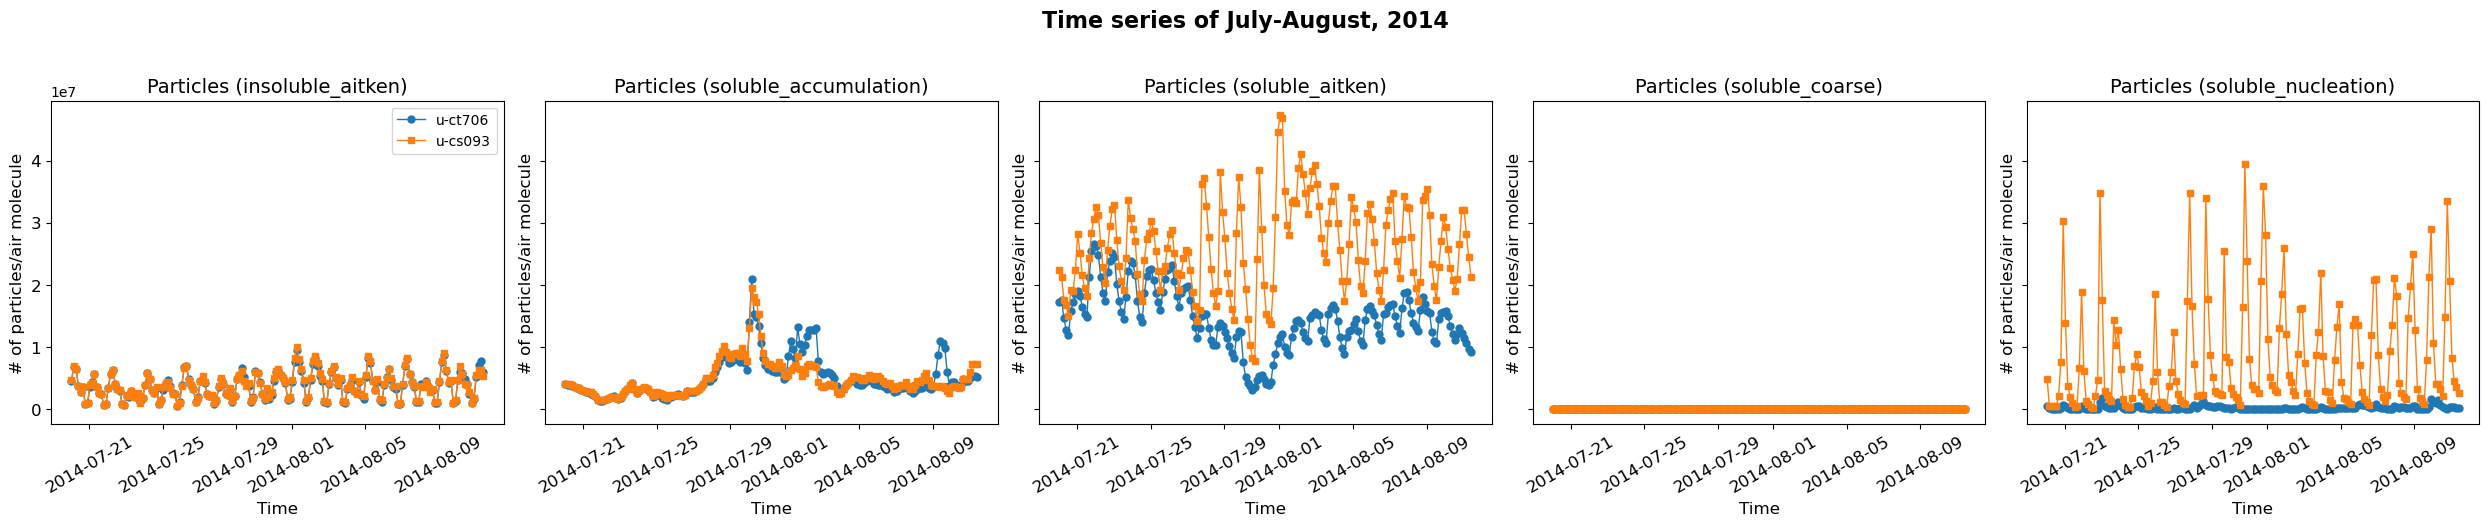

In [ ]:
import xarray as xr
import dask.array as da
import matplotlib.pyplot as plt
import os

def read_pt_data(potential_temperature_file, air_pressure_file):
    chunks = {'time': 20, 'model_level_number': 5, 'grid_latitude': 10, 'grid_longitude': 10}
    
    ds_theta = xr.open_dataset(potential_temperature_file, chunks=chunks)
    ds_p = xr.open_dataset(air_pressure_file, chunks=chunks)

    potential_temperature = ds_theta['air_potential_temperature']
    air_pressure = ds_p['air_pressure']
    
    return potential_temperature, air_pressure

def convert_theta_to_temperature(potential_temperature, air_pressure):
    Rd_cp = 287.05 / 1004.0
    temperature = potential_temperature * (air_pressure / 1000.0) ** Rd_cp  #hpa
    return temperature

def mixing_ratio_to_number_concentration(mixing_ratio_data, air_pressure, actual_temperature):
    R = 287.0
    Na = 6.022e23
    air_density = air_pressure / (R * actual_temperature)
    number_concentration = mixing_ratio_data * air_density * Na
    return number_concentration

#     zboltz=1.3807E-23
#     staird=air_pressure/(actual_temperature*zboltz*1.0E6)
#     number_concentration = mixing_ratio_data * staird
#     return number_concentration
        
        
def process_nc_file(filename, air_pressure, actual_temperature):
    chunks = {'time': 20, 'model_level_number': 5, 'grid_latitude': 10, 'grid_longitude': 10}
    ds = xr.open_dataset(filename, chunks=chunks)
    variable_name = filename.split('/')[-1].split('_')[1:-1]
    variable_data = ds['_'.join(variable_name)]
    number_concentration_data = mixing_ratio_to_number_concentration(variable_data, air_pressure, actual_temperature)
    number_concentration_mean = number_concentration_data.mean(dim=['grid_latitude', 'grid_longitude']).sel(model_level_number=3)
    time_data = ds['time']
    number_concentration_mean_value = number_concentration_mean.compute()
    time_data_value = time_data.compute()
    return number_concentration_mean_value, time_data_value

def process_nc_files(filenames, air_pressure, actual_temperature):
    number_concentration_mean_values = []
    time_data_values = []
    for filename in filenames:
        number_concentration_mean_value, time_data_value = process_nc_file(filename, air_pressure, actual_temperature)
        number_concentration_mean_values.append(number_concentration_mean_value)
        time_data_values.append(time_data_value)
    return number_concentration_mean_values, time_data_values

# Updated plot_data function
def plot_data(time_data_values, number_concentration_mean_values, filenames):
    fig, axes = plt.subplots(1, 5, figsize=(25, 5), sharex=True, sharey=True)
    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
    markers = ['o', 's', '^', 'D', 'v']
    
    labels = []
    for filename in filenames[:5]:  # Only need the first 5 filenames for labels
        variable_name = filename.split('/')[-1].split('_')[8:10]
        variable_name = '_'.join(variable_name)
        label = filename.split('/')[-1].split('_')[3].capitalize() + ' (' + variable_name + ')'
        labels.append(label)

    for i in range(5):
        for j, (time_data_value, number_concentration_mean_value) in enumerate(zip(time_data_values[i::5], number_concentration_mean_values[i::5])):
            axes[i].plot(time_data_value, number_concentration_mean_value, label=f"u-{'ct706' if j == 0 else 'cs093'}", color=colors[j], marker=markers[j], markersize=5, linewidth=1)
            axes[i].set_title(labels[i], fontsize=14)
            axes[i].tick_params(axis='both', labelsize=12)
            axes[i].set_xlabel('Time', fontsize=12)
            axes[i].set_ylabel('#/m3', fontsize=12)

    fig.suptitle('Time series of July-August, 2014', fontsize=16, fontweight='bold')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    for ax in axes:
        for tick in ax.get_xticklabels():
            tick.set_rotation(30)
    axes[0].legend()
    plt.show()


# Example usage code
path_ct706 = "/ocean/projects/atm200005p/ding0928/nc_file_full/u-ct706/full_nc_files/"
path_cs093 = "/ocean/projects/atm200005p/ding0928/nc_file_full/u-cs093/full_nc_files/"

filenames = [
    # u-ct706 files
    path_ct706 + 'Rgn_number_of_particles_per_air_molecule_of_insoluble_aitken_mode_aerosol_in_air_m01s34i119.nc',
    path_ct706 + 'Rgn_number_of_particles_per_air_molecule_of_soluble_accumulation_mode_aerosol_in_air_m01s34i107.nc',
    path_ct706 + 'Rgn_number_of_particles_per_air_molecule_of_soluble_aitken_mode_aerosol_in_air_m01s34i103.nc',
    path_ct706 + 'Rgn_number_of_particles_per_air_molecule_of_soluble_coarse_mode_aerosol_in_air_m01s34i113.nc',
    path_ct706 + 'Rgn_number_of_particles_per_air_molecule_of_soluble_nucleation_mode_aerosol_in_air_m01s34i101.nc',
    # u-cs093 files
    path_cs093 + 'Rgn_number_of_particles_per_air_molecule_of_insoluble_aitken_mode_aerosol_in_air_m01s34i119.nc',
    path_cs093 + 'Rgn_number_of_particles_per_air_molecule_of_soluble_accumulation_mode_aerosol_in_air_m01s34i107.nc',
    path_cs093 + 'Rgn_number_of_particles_per_air_molecule_of_soluble_aitken_mode_aerosol_in_air_m01s34i103.nc',
    path_cs093 + 'Rgn_number_of_particles_per_air_molecule_of_soluble_coarse_mode_aerosol_in_air_m01s34i113.nc',
    path_cs093 + 'Rgn_number_of_particles_per_air_molecule_of_soluble_nucleation_mode_aerosol_in_air_m01s34i101.nc'
]

potential_temperature_file_ct706 = path_ct706 + 'Rgn_air_potential_temperature_m01s00i004.nc'
air_pressure_file_ct706 = path_ct706 + 'Rgn_air_pressure_m01s00i408.nc'

potential_temperature_file_cs093 = path_cs093 + 'Rgn_air_potential_temperature_m01s00i004.nc'
air_pressure_file_cs093 = path_cs093 + 'Rgn_air_pressure_m01s00i408.nc'

potential_temperature_ct706, air_pressure_ct706 = read_pt_data(potential_temperature_file_ct706, air_pressure_file_ct706)
actual_temperature_ct706 = convert_theta_to_temperature(potential_temperature_ct706, air_pressure_ct706)

potential_temperature_cs093, air_pressure_cs093 = read_pt_data(potential_temperature_file_cs093, air_pressure_file_cs093)
actual_temperature_cs093 = convert_theta_to_temperature(potential_temperature_cs093, air_pressure_cs093)

number_concentration_mean_values_ct706, time_data_values_ct706 = process_nc_files(filenames[:5], air_pressure_ct706, actual_temperature_ct706)
number_concentration_mean_values_cs093, time_data_values_cs093 = process_nc_files(filenames[5:], air_pressure_cs093, actual_temperature_cs093)

number_concentration_mean_values = number_concentration_mean_values_ct706 + number_concentration_mean_values_cs093
time_data_values = time_data_values_ct706 + time_data_values_cs093

plot_data(time_data_values, number_concentration_mean_values, filenames[:5] + filenames[5:])


In [ ]:
#13 April, following H suggestion, to trim down the domain size, make it faster for loading.

In [ ]:
# method2: the bbox_extract_2Dcoords and add_lat_lon is from the long python script. I deleted method1

# 1: convert_theta_to_temperature,solved- the unit conversion is wrong;
# 2. keep on giving me threads issue:solved, commented out the large_print function which takes much memory storage.

/tmp/ipykernel_2090093/4165967156.py:54: FutureWarning: Ignoring a datum in netCDF load for consistency with existing behaviour. In a future version of Iris, this datum will be applied. To apply the datum when loading, use the iris.FUTURE.datum_support flag.
  potential_temperature_cube = iris.load_cube(potential_temperature_file)
/tmp/ipykernel_2090093/4165967156.py:55: FutureWarning: Ignoring a datum in netCDF load for consistency with existing behaviour. In a future version of Iris, this datum will be applied. To apply the datum when loading, use the iris.FUTURE.datum_support flag.
  air_pressure_cube = iris.load_cube(air_pressure_file)


357.273 362.673
-2.727 2.673
K
Pa


/tmp/ipykernel_2090093/4165967156.py:54: FutureWarning: Ignoring a datum in netCDF load for consistency with existing behaviour. In a future version of Iris, this datum will be applied. To apply the datum when loading, use the iris.FUTURE.datum_support flag.
  potential_temperature_cube = iris.load_cube(potential_temperature_file)
/tmp/ipykernel_2090093/4165967156.py:55: FutureWarning: Ignoring a datum in netCDF load for consistency with existing behaviour. In a future version of Iris, this datum will be applied. To apply the datum when loading, use the iris.FUTURE.datum_support flag.
  air_pressure_cube = iris.load_cube(air_pressure_file)


357.273 362.673
-2.727 2.673
K
Pa


/tmp/ipykernel_2090093/4165967156.py:89: FutureWarning: Ignoring a datum in netCDF load for consistency with existing behaviour. In a future version of Iris, this datum will be applied. To apply the datum when loading, use the iris.FUTURE.datum_support flag.
  variable_data_cube = iris.load_cube(filename, '_'.join(variable_name))
/jet/home/ding0928/.conda/envs/iris_3.9_vscode/lib/python3.9/site-packages/iris/cube.py:3817: UserWarning: Collapsing spatial coordinate 'grid_latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/jet/home/ding0928/.conda/envs/iris_3.9_vscode/lib/python3.9/site-packages/iris/coords.py:2226: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'grid_latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'grid_latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/jet/home/ding0928/.conda/envs/iris_3.9_vscode/lib/p

number_concentration_mean_values_ct706 shape: 5
time_data_values_ct706: 5
number_concentration_mean_values_cs093 shape: 5
time_data_values_cs093: 5
number_concentration_mean_values shape: 10
time_data_values: 10
time_data_values[i].dimension [390505. 390508. 390511. 390514. 390517. 390520. 390523. 390526. 390529.
 390532. 390535. 390538. 390541. 390544. 390547. 390550. 390553. 390556.
 390559. 390562. 390565. 390568. 390571. 390574. 390577. 390580. 390583.
 390586. 390589. 390592. 390595. 390598. 390601. 390604. 390607. 390610.
 390613. 390616. 390619. 390622. 390625. 390628. 390631. 390634. 390637.
 390640. 390643. 390646. 390649. 390652. 390655. 390658. 390661. 390664.
 390667. 390670. 390673. 390676. 390679. 390682. 390685. 390688. 390691.
 390694. 390697. 390700. 390703. 390706. 390709. 390712. 390715. 390718.
 390721. 390724. 390727. 390730. 390733. 390736. 390739. 390742. 390745.
 390748. 390751. 390754. 390757. 390760. 390763. 390766. 390769. 390772.
 390775. 390778. 390781. 390

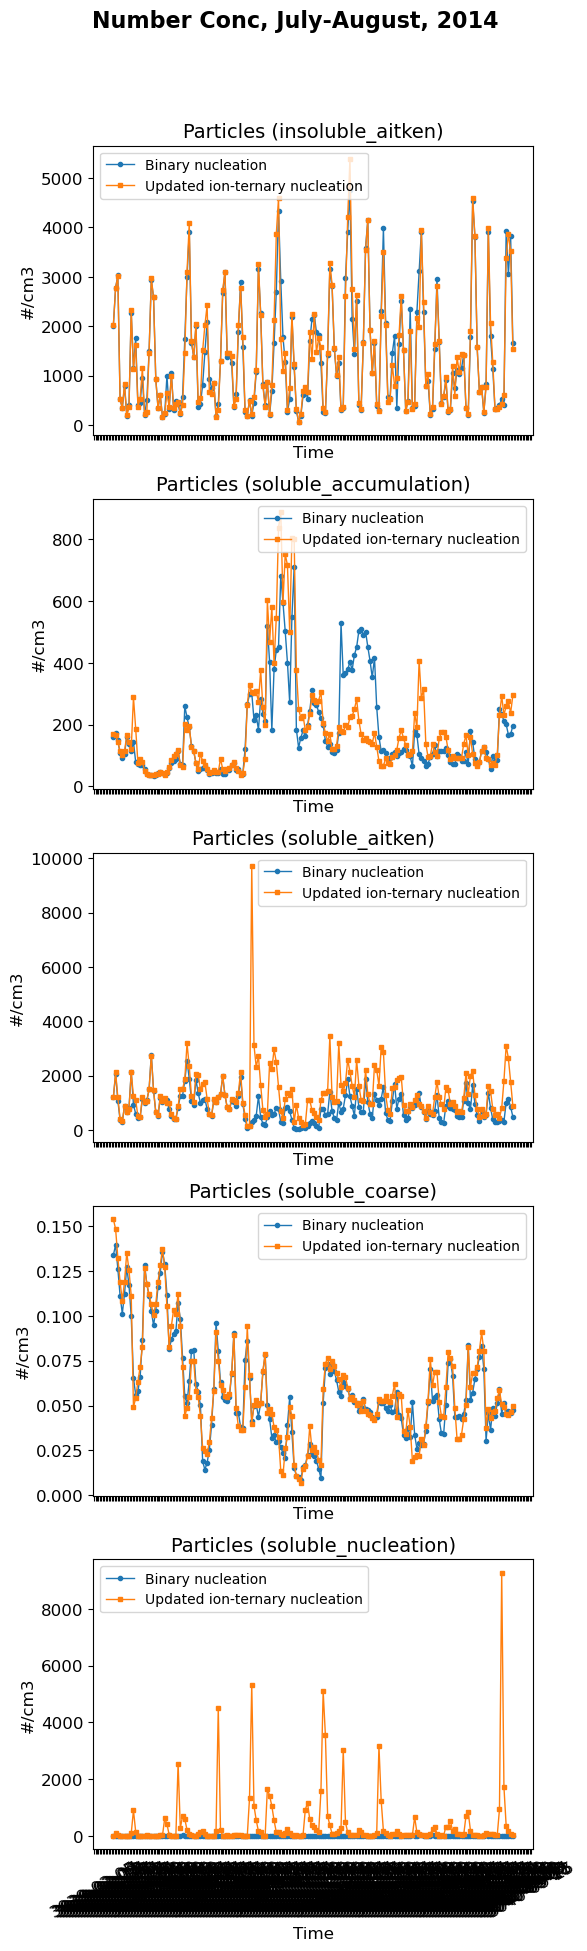

In [ ]:
import xarray as xr
import dask.array as da
import matplotlib.pyplot as plt
import os
import matplotlib.dates as mdates
import numpy as np
import iris
import iris.coord_systems as cs
import iris.coord_systems as coord_systems

os.environ["OPENBLAS_NUM_THREADS"] = "8"

def bbox_extract_2Dcoords(cube, bbox):
    minmax = lambda x: (np.min(x), np.max(x))
    lons = cube.coord('longitude').points 
    lats = cube.coord('latitude').points
    inregion = np.logical_and(np.logical_and(lons > bbox[0],
                                             lons < bbox[1]),
                              np.logical_and(lats > bbox[2],
                                             lats < bbox[3]))
    region_inds = np.where(inregion)
    imin, imax = minmax(region_inds[0])
    jmin, jmax = minmax(region_inds[1])
    return cube[..., imin:imax+1, jmin:jmax+1]

def add_lat_lon(cube, bbox):
    polelat = cube.coord('grid_longitude').coord_system.grid_north_pole_latitude
    polelon = cube.coord('grid_longitude').coord_system.grid_north_pole_longitude  

    source_lon = cube.coord('grid_longitude').points
    source_lat = cube.coord('grid_latitude').points
    lat2d = np.transpose(np.tile(source_lat,[len(source_lon),1]))
    lon2d = np.tile(source_lon,[len(source_lat),1])

    lons, lats = iris.analysis.cartography.unrotate_pole(lon2d, lat2d, polelon, polelat)

    longit = iris.coords.AuxCoord(lons,'longitude', units='degrees', coord_system=cs.GeogCS(6371229.0))
    latit =  iris.coords.AuxCoord(lats,'latitude', units='degrees', coord_system=cs.GeogCS(6371229.0))
    
    i_test = 1 # a label for turn-on/off 
    if i_test == 0:
        # Determine the dimensions to add the latitude and longitude coordinates
        dims = tuple(range(cube.ndim))
        for dim in ('time', 'model_level_number', 'grid_latitude', 'grid_longitude'):
            if dim in cube.dim_coords:
                dims = tuple(d for d in dims if d != cube.coord_dims(dim)[0])

    cube.add_aux_coord(longit, (2,3)) 
    cube.add_aux_coord(latit, (2,3))

    return bbox_extract_2Dcoords(cube, bbox)

def read_pt_data(potential_temperature_file, air_pressure_file, bbox):
    potential_temperature_cube = iris.load_cube(potential_temperature_file)
    air_pressure_cube = iris.load_cube(air_pressure_file)
    print(potential_temperature_cube.coord('grid_longitude').points.min(), potential_temperature_cube.coord('grid_longitude').points.max())
    print(potential_temperature_cube.coord('grid_latitude').points.min(), potential_temperature_cube.coord('grid_latitude').points.max())
    print(potential_temperature_cube.units) # K
    print(air_pressure_cube.units) #Pa

    # Add the latitude and longitude coordinates to the cubes
    potential_temperature_cube = add_lat_lon(potential_temperature_cube, bbox)
    air_pressure_cube = add_lat_lon(air_pressure_cube, bbox)
    return potential_temperature_cube, air_pressure_cube

# a subroutine to convert theta to T(k)
def convert_theta_to_temperature(potential_temperature, air_pressure):
    p0 = iris.coords.AuxCoord(100000.0, long_name='reference_pressure', units='Pa')
    Rd_cp = 287.05 / 1004.0  
    air_pressure_ratio = air_pressure/p0
    air_pressure_ratio.convert_units('1')
    temperature = potential_temperature*(air_pressure_ratio)**(Rd_cp)
    # now the T looks correct, in 280~, so I commented it out now
    # for i, temp in enumerate(temperature.data.flatten()):
    #     print(f'Temperature at grid point {i+1}: {temp:.2f} K')       
    return temperature

# a subroutine to convert from kg/kg to molecule cm-3
def mixing_ratio_to_number_concentration(mixing_ratio_data, air_pressure, actual_temperature):
    zboltz = 1.3807E-23  # (J/K) R = k * N_A, k=J/K, Avogadro's number (N_A)=6.022 x 10²³ entities/mol.
    staird = air_pressure / (actual_temperature * zboltz * 1.0E6)  # 1.0E6 from m3 to cm3, another form of ideal gas law
    number_concentration = mixing_ratio_data * staird
    number_concentration.units = 'molecule cm-3'
    return number_concentration

#the new traditional iris method is under test.
def process_single_file(filename, air_pressure, actual_temperature, bbox):
    variable_name = filename.split('/')[-1].split('_')[1:-1]
    variable_data_cube = iris.load_cube(filename, '_'.join(variable_name))
    variable_data_cube = add_lat_lon(variable_data_cube, bbox)

    number_concentration_data = mixing_ratio_to_number_concentration(variable_data_cube, air_pressure, actual_temperature)
    number_concentration_mean = number_concentration_data.collapsed(['grid_latitude', 'grid_longitude'], iris.analysis.MEAN)
    number_concentration_mean = number_concentration_mean.extract(iris.Constraint(model_level_number=2))

    time_data = variable_data_cube.coord('time')
    time_data_value = time_data.points
    
    # print("Number concentration mean shape:", number_concentration_mean.shape)
    # print("Time data value shape:", time_data_value.shape)

    return number_concentration_mean, time_data_value


def process_nc_files(filenames, air_pressure, actual_temperature, bbox):
    number_concentration_mean_values = []
    time_data_values = []
    for filename in filenames:
        number_concentration_mean_value, time_data_value = process_single_file(filename, air_pressure, actual_temperature, bbox)
        number_concentration_mean_values.append(number_concentration_mean_value)
        time_data_values.append(time_data_value)
    return number_concentration_mean_values, time_data_values


def plot_data(time_data_values, number_concentration_mean_values, filenames):
    fig, axes = plt.subplots(5, 1, figsize=(6, 20), sharex=True)
    colors = ['tab:blue', 'tab:orange']
    markers = ['o', 's']
    labels = ['Binary nucleation', 'Updated ion-ternary nucleation']

    for i in range(5):
        print("time_data_values[i].dimension",time_data_values[i])
        print("number_concentration_mean_values[i][0].data.dimension",number_concentration_mean_values[i].data)
        axes[i].plot(time_data_values[i], number_concentration_mean_values[i].data, label=labels[0], color=colors[0], marker=markers[0], markersize=3, linewidth=1)
        axes[i].plot(time_data_values[i+5], number_concentration_mean_values[i+5].data, label=labels[1], color=colors[1], marker=markers[1], markersize=3, linewidth=1)

        variable_name = filenames[i].split('/')[-1].split('_')[8:10]
        variable_name = '_'.join(variable_name)
        title = filenames[i].split('/')[-1].split('_')[3].capitalize() + ' (' + variable_name + ')'
        axes[i].set_title(title, fontsize=14)

        axes[i].tick_params(axis='both', labelsize=12)
        axes[i].set_xlabel('Time', fontsize=12)
        axes[i].set_ylabel('#/cm3', fontsize=12)
        axes[i].legend()

    fig.suptitle('Number Conc, July-August, 2014', fontsize=16, fontweight='bold')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.xticks(rotation=30)
    plt.show()


# Now need to read in the file
path_ct706 = "/ocean/projects/atm200005p/ding0928/nc_file_full/u-ct706/full_nc_files/" #i_nuc=2
path_cs093 = "/ocean/projects/atm200005p/ding0928/nc_file_full/u-cs093/full_nc_files/" #i_nuc=4

filenames = [
    path_ct706 + 'Rgn_number_of_particles_per_air_molecule_of_insoluble_aitken_mode_aerosol_in_air_m01s34i119.nc',
    path_ct706 + 'Rgn_number_of_particles_per_air_molecule_of_soluble_accumulation_mode_aerosol_in_air_m01s34i107.nc',
    path_ct706 + 'Rgn_number_of_particles_per_air_molecule_of_soluble_aitken_mode_aerosol_in_air_m01s34i103.nc',
    path_ct706 + 'Rgn_number_of_particles_per_air_molecule_of_soluble_coarse_mode_aerosol_in_air_m01s34i113.nc',
    path_ct706 + 'Rgn_number_of_particles_per_air_molecule_of_soluble_nucleation_mode_aerosol_in_air_m01s34i101.nc',
    path_cs093 + 'Rgn_number_of_particles_per_air_molecule_of_insoluble_aitken_mode_aerosol_in_air_m01s34i119.nc',
    path_cs093 + 'Rgn_number_of_particles_per_air_molecule_of_soluble_accumulation_mode_aerosol_in_air_m01s34i107.nc',
    path_cs093 + 'Rgn_number_of_particles_per_air_molecule_of_soluble_aitken_mode_aerosol_in_air_m01s34i103.nc',
    path_cs093 + 'Rgn_number_of_particles_per_air_molecule_of_soluble_coarse_mode_aerosol_in_air_m01s34i113.nc',
    path_cs093 + 'Rgn_number_of_particles_per_air_molecule_of_soluble_nucleation_mode_aerosol_in_air_m01s34i101.nc'
]

potential_temperature_file_ct706 = path_ct706 + 'Rgn_air_potential_temperature_m01s00i004.nc'
air_pressure_file_ct706 = path_ct706 + 'Rgn_air_pressure_m01s00i408.nc'

potential_temperature_file_cs093 = path_cs093 + 'Rgn_air_potential_temperature_m01s00i004.nc'
air_pressure_file_cs093 = path_cs093 + 'Rgn_air_pressure_m01s00i408.nc'

# Define the bounding box (in degrees) for the area of interest
bbox = [-105, -104.5, 40.4, 40.8] # low-altitude region, near BAO tower
# bbox = [-105, -104.5, 40.4, 40.8] # low-altitude region, near BAO tower
potential_temperature_ct706, air_pressure_ct706 = read_pt_data(potential_temperature_file_ct706, air_pressure_file_ct706, bbox)
actual_temperature_ct706 = convert_theta_to_temperature(potential_temperature_ct706, air_pressure_ct706)

potential_temperature_cs093, air_pressure_cs093 = read_pt_data(potential_temperature_file_cs093, air_pressure_file_cs093, bbox)
actual_temperature_cs093 = convert_theta_to_temperature(potential_temperature_cs093, air_pressure_cs093)

number_concentration_mean_values_ct706, time_data_values_ct706 = process_nc_files(filenames[:5], air_pressure_ct706, actual_temperature_ct706, bbox)
number_concentration_mean_values_cs093, time_data_values_cs093 = process_nc_files(filenames[5:], air_pressure_cs093, actual_temperature_cs093, bbox)
number_concentration_mean_values = number_concentration_mean_values_ct706 + number_concentration_mean_values_cs093
time_data_values = time_data_values_ct706 + time_data_values_cs093

plot_data(time_data_values, number_concentration_mean_values, filenames[:5] + filenames[5:])



In [ ]:
# so previous code cell is for testing in jupyter lab, but it takes so much time; instead I used .py and run it in terminal;
# the code is in /ocean/projects/atm200005p/ding0928/scripts/time_series_dask_working.py
# no big difference between .py and .ipynb, but .py is faster

In [6]:
# %load /ocean/projects/atm200005p/ding0928/script_full_nc/time_series_dask_working.py
import xarray as xr
import dask.array as da
import matplotlib.pyplot as plt
import os
import matplotlib.dates as mdates
import numpy as np
import iris
import iris.coord_systems as cs
import iris.coord_systems as coord_systems

os.environ["OPENBLAS_NUM_THREADS"] = "8"

def bbox_extract_2Dcoords(cube, bbox):
    minmax = lambda x: (np.min(x), np.max(x))
    lons = cube.coord('longitude').points 
    lats = cube.coord('latitude').points
    inregion = np.logical_and(np.logical_and(lons > bbox[0],
                                             lons < bbox[1]),
                              np.logical_and(lats > bbox[2],
                                             lats < bbox[3]))
    region_inds = np.where(inregion)
    imin, imax = minmax(region_inds[0])
    jmin, jmax = minmax(region_inds[1])
    return cube[..., imin:imax+1, jmin:jmax+1]

def add_lat_lon(cube, bbox):
    polelat = cube.coord('grid_longitude').coord_system.grid_north_pole_latitude
    polelon = cube.coord('grid_longitude').coord_system.grid_north_pole_longitude  

    source_lon = cube.coord('grid_longitude').points
    source_lat = cube.coord('grid_latitude').points
    lat2d = np.transpose(np.tile(source_lat,[len(source_lon),1]))
    lon2d = np.tile(source_lon,[len(source_lat),1])

    lons, lats = iris.analysis.cartography.unrotate_pole(lon2d, lat2d, polelon, polelat)

    longit = iris.coords.AuxCoord(lons,'longitude', units='degrees', coord_system=cs.GeogCS(6371229.0))
    latit =  iris.coords.AuxCoord(lats,'latitude', units='degrees', coord_system=cs.GeogCS(6371229.0))
    
    i_test = 1 # a label for turn-on/off 
    if i_test == 0:
        # Determine the dimensions to add the latitude and longitude coordinates
        dims = tuple(range(cube.ndim))
        for dim in ('time', 'model_level_number', 'grid_latitude', 'grid_longitude'):
            if dim in cube.dim_coords:
                dims = tuple(d for d in dims if d != cube.coord_dims(dim)[0])

    cube.add_aux_coord(longit, (2,3)) 
    cube.add_aux_coord(latit, (2,3))

    return bbox_extract_2Dcoords(cube, bbox)

def read_pt_data(potential_temperature_file, air_pressure_file, bbox):
    potential_temperature_cube = iris.load_cube(potential_temperature_file)
    air_pressure_cube = iris.load_cube(air_pressure_file)
    print(potential_temperature_cube.coord('grid_longitude').points.min(), potential_temperature_cube.coord('grid_longitude').points.max())
    print(potential_temperature_cube.coord('grid_latitude').points.min(), potential_temperature_cube.coord('grid_latitude').points.max())
    print(potential_temperature_cube.units) # K
    print(air_pressure_cube.units) #Pa

    # Add the latitude and longitude coordinates to the cubes
    potential_temperature_cube = add_lat_lon(potential_temperature_cube, bbox)
    air_pressure_cube = add_lat_lon(air_pressure_cube, bbox)
    return potential_temperature_cube, air_pressure_cube

# a subroutine to convert theta to T(k)
def convert_theta_to_temperature(potential_temperature, air_pressure):
    p0 = iris.coords.AuxCoord(100000.0, long_name='reference_pressure', units='Pa')
    Rd_cp = 287.05 / 1004.0  
    air_pressure_ratio = air_pressure/p0
    air_pressure_ratio.convert_units('1')
    temperature = potential_temperature*(air_pressure_ratio)**(Rd_cp)
    # now the T looks correct, in 280~, so I commented it out now
#     for i, temp in enumerate(temperature.data.flatten()):
#         print(f'Temperature at grid point {i+1}: {temp:.2f} K')       
    return temperature

# to convert from kg/kg to molecule cm-3
def mixing_ratio_to_number_concentration(mixing_ratio_data, air_pressure, actual_temperature):
    zboltz = 1.3807E-23  # (J/K) R = k * N_A, k=J/K, Avogadro's number (N_A)=6.022 x 1023 entities/mol.
    staird = air_pressure / (actual_temperature * zboltz * 1.0E6)  # 1.0E6 from m3 to cm3, another form of ideal gas law
    number_concentration = mixing_ratio_data * staird
    number_concentration.units = 'molecule cm-3'
    return number_concentration

#iris to process one single file
def process_single_file(filename, air_pressure, actual_temperature, bbox):
    variable_name = filename.split('/')[-1].split('_')[1:-1]
    variable_data_cube = iris.load_cube(filename, '_'.join(variable_name))
    variable_data_cube = add_lat_lon(variable_data_cube, bbox)

    # Select only the desired vertical levels (bottom 1-10)
    # variable_data_cube = variable_data_cube.extract(iris.Constraint(model_level_number=lambda x: 1 <= x <= 10))

    number_concentration_data = mixing_ratio_to_number_concentration(variable_data_cube, air_pressure, actual_temperature)
    number_concentration_mean = number_concentration_data.collapsed(['grid_latitude', 'grid_longitude'], iris.analysis.MEAN)
    number_concentration_mean = number_concentration_mean.extract(iris.Constraint(model_level_number=2))

    time_data = variable_data_cube.coord('time')
    time_data_value = time_data.points
    return number_concentration_mean, time_data_value

# to process all the files within a loop
def process_nc_files(filenames, air_pressure, actual_temperature, bbox):
    number_concentration_mean_values = []
    time_data_values = []
    for filename in filenames:
        number_concentration_mean_value, time_data_value = process_single_file(filename, air_pressure, actual_temperature, bbox)
        number_concentration_mean_values.append(number_concentration_mean_value)
        time_data_values.append(time_data_value)
    return number_concentration_mean_values, time_data_values


def plot_data(time_data_values, number_concentration_mean_values, filenames):
    fig, axes = plt.subplots(5, 1, figsize=(6, 20), sharex=True)
    colors = ['tab:blue', 'tab:orange']
    markers = ['o', 's']
    labels = ['Binary nucleation', 'Updated ion-ternary nucleation']
    
    for i in range(5):
        # print("time_data_values[i].dimension",time_data_values[i])
        # print("number_concentration_mean_values[i][0].data.dimension",number_concentration_mean_values[i].data)
        axes[i].plot(time_data_values[i], number_concentration_mean_values[i].data, label=labels[0], color=colors[0], marker=markers[0], markersize=3, linewidth=1)
        axes[i].plot(time_data_values[i+5], number_concentration_mean_values[i+5].data, label=labels[1], color=colors[1], marker=markers[1], markersize=3, linewidth=1)

        variable_name = filenames[i].split('/')[-1].split('_')[8:10]
        variable_name = '_'.join(variable_name)
        title = filenames[i].split('/')[-1].split('_')[3].capitalize() + ' (' + variable_name + ')'
        axes[i].set_title(title, fontsize=14)

        axes[i].tick_params(axis='both', labelsize=12)
        axes[i].set_xlabel('Time', fontsize=12)
        axes[i].set_ylabel('#/cm3', fontsize=12)
        axes[i].legend()

    fig.suptitle('BAO tower:40.5°N, -105W', fontsize=16, fontweight='bold')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.xticks(rotation=30)
    plt.show()
    plt.savefig('BAO_tower_40.5°N_-105.png')

# Now need to read in the file
path_ct706 = "/ocean/projects/atm200005p/ding0928/nc_file_full/u-ct706/full_nc_files/" #i_nuc=2
path_cs093 = "/ocean/projects/atm200005p/ding0928/nc_file_full/u-cs093/full_nc_files/" #i_nuc=4

filenames = [
    path_ct706 + 'Rgn_number_of_particles_per_air_molecule_of_insoluble_aitken_mode_aerosol_in_air_m01s34i119.nc',
    path_ct706 + 'Rgn_number_of_particles_per_air_molecule_of_soluble_accumulation_mode_aerosol_in_air_m01s34i107.nc',
    path_ct706 + 'Rgn_number_of_particles_per_air_molecule_of_soluble_aitken_mode_aerosol_in_air_m01s34i103.nc',
    path_ct706 + 'Rgn_number_of_particles_per_air_molecule_of_soluble_coarse_mode_aerosol_in_air_m01s34i113.nc',
    path_ct706 + 'Rgn_number_of_particles_per_air_molecule_of_soluble_nucleation_mode_aerosol_in_air_m01s34i101.nc',
    path_cs093 + 'Rgn_number_of_particles_per_air_molecule_of_insoluble_aitken_mode_aerosol_in_air_m01s34i119.nc',
    path_cs093 + 'Rgn_number_of_particles_per_air_molecule_of_soluble_accumulation_mode_aerosol_in_air_m01s34i107.nc',
    path_cs093 + 'Rgn_number_of_particles_per_air_molecule_of_soluble_aitken_mode_aerosol_in_air_m01s34i103.nc',
    path_cs093 + 'Rgn_number_of_particles_per_air_molecule_of_soluble_coarse_mode_aerosol_in_air_m01s34i113.nc',
    path_cs093 + 'Rgn_number_of_particles_per_air_molecule_of_soluble_nucleation_mode_aerosol_in_air_m01s34i101.nc'
]

potential_temperature_file_ct706 = path_ct706 + 'Rgn_air_potential_temperature_m01s00i004.nc'
air_pressure_file_ct706 = path_ct706 + 'Rgn_air_pressure_m01s00i408.nc'

potential_temperature_file_cs093 = path_cs093 + 'Rgn_air_potential_temperature_m01s00i004.nc'
air_pressure_file_cs093 = path_cs093 + 'Rgn_air_pressure_m01s00i408.nc'

# Define the bounding box (in degrees) for the area of interest
bbox = [-105, -104.5, 40.4, 40.8] #BAO tower, low altitude
#bbox = [-107, -106.5, 40.5, 40.8] #Storm Peak Lab:40.45° N, 106.6°  wester-high-altitude
potential_temperature_ct706, air_pressure_ct706 = read_pt_data(potential_temperature_file_ct706, air_pressure_file_ct706, bbox)
actual_temperature_ct706 = convert_theta_to_temperature(potential_temperature_ct706, air_pressure_ct706)

potential_temperature_cs093, air_pressure_cs093 = read_pt_data(potential_temperature_file_cs093, air_pressure_file_cs093, bbox)
actual_temperature_cs093 = convert_theta_to_temperature(potential_temperature_cs093, air_pressure_cs093)

number_concentration_mean_values_ct706, time_data_values_ct706 = process_nc_files(filenames[:5], air_pressure_ct706, actual_temperature_ct706, bbox)
number_concentration_mean_values_cs093, time_data_values_cs093 = process_nc_files(filenames[5:], air_pressure_cs093, actual_temperature_cs093, bbox)
number_concentration_mean_values = number_concentration_mean_values_ct706 + number_concentration_mean_values_cs093
time_data_values = time_data_values_ct706 + time_data_values_cs093

plot_data(time_data_values, number_concentration_mean_values, filenames[:5] + filenames[5:])


/tmp/ipykernel_1127855/3078776284.py:55: FutureWarning: Ignoring a datum in netCDF load for consistency with existing behaviour. In a future version of Iris, this datum will be applied. To apply the datum when loading, use the iris.FUTURE.datum_support flag.
  potential_temperature_cube = iris.load_cube(potential_temperature_file)
/tmp/ipykernel_1127855/3078776284.py:56: FutureWarning: Ignoring a datum in netCDF load for consistency with existing behaviour. In a future version of Iris, this datum will be applied. To apply the datum when loading, use the iris.FUTURE.datum_support flag.
  air_pressure_cube = iris.load_cube(air_pressure_file)


357.273 362.673
-2.727 2.673
K
Pa


/tmp/ipykernel_1127855/3078776284.py:55: FutureWarning: Ignoring a datum in netCDF load for consistency with existing behaviour. In a future version of Iris, this datum will be applied. To apply the datum when loading, use the iris.FUTURE.datum_support flag.
  potential_temperature_cube = iris.load_cube(potential_temperature_file)
/tmp/ipykernel_1127855/3078776284.py:56: FutureWarning: Ignoring a datum in netCDF load for consistency with existing behaviour. In a future version of Iris, this datum will be applied. To apply the datum when loading, use the iris.FUTURE.datum_support flag.
  air_pressure_cube = iris.load_cube(air_pressure_file)


357.273 362.673
-2.727 2.673
K
Pa


/tmp/ipykernel_1127855/3078776284.py:90: FutureWarning: Ignoring a datum in netCDF load for consistency with existing behaviour. In a future version of Iris, this datum will be applied. To apply the datum when loading, use the iris.FUTURE.datum_support flag.
  variable_data_cube = iris.load_cube(filename, '_'.join(variable_name))
/jet/home/ding0928/.conda/envs/iris_3.9_vscode/lib/python3.9/site-packages/iris/cube.py:3817: UserWarning: Collapsing spatial coordinate 'grid_latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/jet/home/ding0928/.conda/envs/iris_3.9_vscode/lib/python3.9/site-packages/iris/coords.py:2226: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'grid_latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'grid_latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/jet/home/ding0928/.conda/envs/iris_3.9_vscode/lib/p

/tmp/ipykernel_1127855/152092171.py:9: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('/ocean/projects/atm200005p/ding0928/nc_file_full/Storm_Peak_julaug_2014.nas',


0       20140701000000
1       20140701010000
2       20140701015959
3       20140701030000
4       20140701040000
             ...      
1483    20140831190000
1484    20140831195959
1485    20140831210000
1486    20140831220000
1487    20140831225959
Name: date, Length: 1488, dtype: object
top3_dates_str ['20140723', '20140722', '20140803']
date_str: 20140723
start: 20140723000000
end: 20140724000000
daily_mean_val: 5986.9375
arrow_x: 16274.5
date_str: 20140722
start: 20140722000000
end: 20140723000000
daily_mean_val: 4513.533333333334
arrow_x: 16273.5
date_str: 20140803
start: 20140803000000
end: 20140804000000
daily_mean_val: 4171.1875
arrow_x: 16285.5


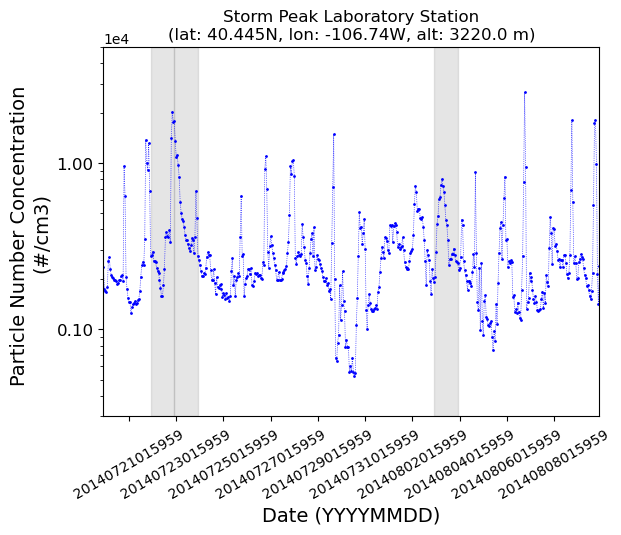

In [5]:
#so the arrow is not working for all 3 versions of loop funciton.
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from datetime import datetime
import matplotlib.offsetbox as offsetbox

df = pd.read_csv('/ocean/projects/atm200005p/ding0928/nc_file_full/Storm_Peak_julaug_2014.nas', 
                 delim_whitespace=True, 
                 skiprows=74, 
                 error_bad_lines=False)
ref_date = pd.to_datetime('2014-01-01')
df['date'] = ref_date + pd.to_timedelta(df['starttime'], unit='D')
df['date'] = df['date'].dt.strftime('%Y%m%d%H%M%S')
print(df['date'])

fig, ax = plt.subplots()
ax.plot(df['date'], df['particle_number_concentration'], 'bo', markersize=1.0)
ax.plot(df['date'], df['particle_number_concentration'], ':', color='blue', linewidth=0.5)
ax.set_xlabel('Date (YYYYMMDD)', fontsize=14)
ax.set_ylabel('Particle Number Concentration \n(#/cm3)', fontsize=14)
ax.set_title('Storm Peak Laboratory Station\n(lat: 40.445N, lon: -106.74W, alt: 3220.0 m)')

locator = mdates.DayLocator(interval=48) #houlry interval=24*2 days=48
ax.xaxis.set_major_locator(locator)
plt.xticks(rotation=30)
ax.set_yscale('log')
ax.set_ylim([3e2, 5e4])
ax.set_xlim(pd.Timestamp('2014-07-20').strftime('%Y%m%d%H%M%S'), 
            pd.Timestamp('2014-08-10').strftime('%Y%m%d%H%M%S'))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.get_major_formatter().set_powerlimits((0, 4))
ax.tick_params(axis='y', labelsize=12)

#Now I want to add a shaded region for the top 3 days of maximum daily mean number concentration
# step 1:calculate the daily mean number concentration
df['date'] = pd.to_datetime(df['date'])
daily_mean = df.groupby(pd.Grouper(key='date', freq='D'))['particle_number_concentration'].mean()
# step 2: get the top 3 days of maximum daily mean number concentration
df = df.set_index(pd.DatetimeIndex(df['date']))
daily_mean = daily_mean.loc['2014-07-20':'2014-08-10']
top3_dates = daily_mean.nlargest(3).index
top3_dates_str = [d.strftime('%Y%m%d') for d in top3_dates]
print('top3_dates_str',top3_dates_str)    # ['20140723', '20140722', '20140803']
# step 3: add shaded regions for the top 3 days of maximum daily mean number concentration failed!

#version 3 for arrow:
for date_str in top3_dates_str:
    start = pd.Timestamp(date_str).strftime('%Y%m%d%H%M%S')
    end = pd.Timestamp(date_str) + pd.Timedelta(days=1)
    end = end.strftime('%Y%m%d%H%M%S')
    ax.axvspan(start, end, alpha=0.2, color='gray')

    # get the daily mean value for the shaded region
    daily_mean_val = daily_mean[date_str]
    daily_mean.index = pd.to_datetime(daily_mean.index)

    arrow_x = pd.to_datetime(start) + pd.to_timedelta((pd.to_datetime(end) - pd.to_datetime(start)) / 2)
    arrow_x = mdates.date2num(arrow_x)  # Convert datetime object to matplotlib date number

    print('date_str:', date_str)
    print('start:', start)
    print('end:', end)
    print('daily_mean_val:', daily_mean_val)
    print('arrow_x:', arrow_x)

    try:
        offset_box = offsetbox.AnnotationBbox(offsetbox.TextArea(f'mean = {daily_mean_val:.2f}'), 
                                                xy=(arrow_x, daily_mean_val), 
                                                xybox=(arrow_x, daily_mean_val), 
                                                boxcoords="data", 
                                                arrowprops=dict(facecolor='black', arrowstyle='->', 
                                                                connectionstyle='arc3,rad=0.2', relpos=(0.5, 0.5), 
                                                                mutation_scale=15), 
                                                pad=0.5)
        ax.add_artist(offset_box)
    except Exception as e:
        print('Error adding annotation:', e)

plt.show()


In [ ]:
# function version
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from datetime import datetime
import matplotlib.offsetbox as offsetbox

def read_data(file_path):
    df = pd.read_csv(file_path, delim_whitespace=True, skiprows=74, error_bad_lines=False)
    ref_date = pd.to_datetime('2014-01-01')
    df['date'] = ref_date + pd.to_timedelta(df['starttime'], unit='D')
    df['date'] = df['date'].dt.strftime('%Y%m%d%H%M%S')
    return df

def plot_data(df):
    fig, ax = plt.subplots()
    ax.plot(df['date'], df['particle_number_concentration'], 'bo', markersize=1.0)
    ax.plot(df['date'], df['particle_number_concentration'], ':', color='blue', linewidth=0.5)
    ax.set_xlabel('Date (YYYYMMDD)', fontsize=14)
    ax.set_ylabel('Particle Number Concentration \n(#/cm3)', fontsize=14)
    ax.set_title('Storm Peak Laboratory Station\n(lat: 40.445N, lon: -106.74W, alt: 3220.0 m)')

    locator = mdates.DayLocator(interval=48)
    ax.xaxis.set_major_locator(locator)
    plt.xticks(rotation=30)
    ax.set_yscale('log')
    ax.set_ylim([3e2, 5e4])
    ax.set_xlim(pd.Timestamp('2014-07-20').strftime('%Y%m%d%H%M%S'), pd.Timestamp('2014-08-10').strftime('%Y%m%d%H%M%S'))
    ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
    ax.yaxis.get_major_formatter().set_powerlimits((0, 4))
    ax.tick_params(axis='y', labelsize=12)
    return ax

def add_shaded_regions(ax, df):
    #Now I want to add a shaded region for the top 3 days of maximum daily mean number concentration
    # step 1:calculate the daily mean number concentration
    df['date'] = pd.to_datetime(df['date'])
    daily_mean = df.groupby(pd.Grouper(key='date', freq='D'))['particle_number_concentration'].mean()
    # step 2: get the top 3 days of maximum daily mean number concentration
    df = df.set_index(pd.DatetimeIndex(df['date']))
    daily_mean = daily_mean.loc['2014-07-20':'2014-08-10']
    top3_dates = daily_mean.nlargest(3).index
    top3_dates_str = [d.strftime('%Y%m%d') for d in top3_dates]
    print('top3_dates_str',top3_dates_str)    # ['20140723', '20140722', '20140803']
    # step 3: add shaded regions for the top 3 days of maximum daily mean number concentration failed!

    #version 3 for arrow:
    for date_str in top3_dates_str:
        start = pd.Timestamp(date_str).strftime('%Y%m%d%H%M%S')
        end = pd.Timestamp(date_str) + pd.Timedelta(days=1)
        end = end.strftime('%Y%m%d%H%M%S')
        ax.axvspan(start, end, alpha=0.2, color='gray')

        # get the daily mean value for the shaded region
        daily_mean_val = daily_mean[date_str]
        daily_mean.index = pd.to_datetime(daily_mean.index)

        arrow_x = pd.to_datetime(start) + pd.to_timedelta((pd.to_datetime(end) - pd.to_datetime(start)) / 2)
        arrow_x = mdates.date2num(arrow_x)  # Convert datetime object to matplotlib date number

        print('date_str:', date_str)
        print('start:', start)
        print('end:', end)
        print('daily_mean_val:', daily_mean_val)
        print('arrow_x:', arrow_x)

        try:
            offset_box = offsetbox.AnnotationBbox(offsetbox.TextArea(f'mean = {daily_mean_val:.2f}'), 
                                                    xy=(arrow_x, daily_mean_val), 
                                                    xybox=(arrow_x, daily_mean_val), 
                                                    boxcoords="data", 
                                                    arrowprops=dict(facecolor='black', arrowstyle='->', 
                                                                    connectionstyle='arc3,rad=0.2', relpos=(0.5, 0.5), 
                                                                    mutation_scale=15), 
                                                    pad=0.5)
            ax.add_artist(offset_box)
        except Exception as e:
            print('Error adding annotation:', e)
file_path = '/ocean/projects/atm200005p/ding0928/nc_file_full/Storm_Peak_julaug_2014.nas'
df = read_data(file_path)
ax = plot_data(df)
add_shaded_regions(ax, df)
plt.show()


In [ ]:
# other 2 methods for arrow but not showing up
# for date_str in top3_dates_str:
#     start = pd.Timestamp(date_str).strftime('%Y%m%d%H%M%S')
#     end = pd.Timestamp(date_str) + pd.Timedelta(days=1)
#     end = end.strftime('%Y%m%d%H%M%S')
#     ax.axvspan(start, end, alpha=0.2, color='gray')
#     # until here the above code works fine to add the shaded regions
#     # get the daily mean value for the shaded region
#     daily_mean_val = daily_mean[date_str]
#     daily_mean.index = pd.to_datetime(daily_mean.index)
#     print('daily_mean_val', daily_mean_val)
#     arrow_x = pd.to_datetime(start) + pd.to_timedelta((pd.to_datetime(end) - pd.to_datetime(start)) / 2)
#     print('arrow_x', arrow_x)
#     arrow_x = mdates.date2num(arrow_x)  # Convert datetime object to matplotlib date number

#     ax.annotate(f'mean = {daily_mean_val:.2f}', xy=(arrow_x, daily_mean_val), xytext=(arrow_x, daily_mean_val*1.1), 
#             arrowprops=dict(facecolor='black', shrink=0.05), ha='center', textcoords='offset points', offset=(0,10))

#version 2 the arrow is not showing up in the plot:
# for date_str in top3_dates_str:
#     start = pd.Timestamp(date_str).strftime('%Y%m%d%H%M%S')
#     end = pd.Timestamp(date_str) + pd.Timedelta(days=1)
#     end = end.strftime('%Y%m%d%H%M%S')
#     ax.axvspan(start, end, alpha=0.2, color='gray')
#     # get the daily mean value for the shaded region
#     daily_mean_val = daily_mean[date_str]
#     daily_mean.index = pd.to_datetime(daily_mean.index)
#     print('daily_mean_val', daily_mean_val)
#     arrow_x = pd.to_datetime(start) + pd.to_timedelta((pd.to_datetime(end) - pd.to_datetime(start)) / 2)
#     print('arrow_x', arrow_x)
#     arrow_x = mdates.date2num(arrow_x)  # Convert datetime object to matplotlib date number
#     print('arrow_x', arrow_x) 
#     # create an offset box for the annotation
#     offset_box = offsetbox.AnnotationBbox(offsetbox.TextArea(f'mean = {daily_mean_val:.2f}'), xy=(arrow_x, daily_mean_val), xybox=(arrow_x, daily_mean_val*1.1), 
#                                            boxcoords="data", arrowprops=dict(facecolor='black', arrowstyle='->', connectionstyle='arc3,rad=0.2', 
#                                                                            relpos=(0.5, 0.5), mutation_scale=15), pad=0.5)

#     ax.add_artist(offset_box)

0             181 days 00:00:00
1      181 days 01:00:00.028800
2      181 days 01:59:59.971200
3             181 days 03:00:00
4      181 days 04:00:00.028800
                 ...           
1483   242 days 19:00:00.028800
1484   242 days 19:59:59.971200
1485          242 days 21:00:00
1486   242 days 22:00:00.028800
1487   242 days 22:59:59.971200
Name: starttime, Length: 1488, dtype: timedelta64[ns]
df[date] 0      2014-07-01 00:00:00.000000
1      2014-07-01 01:00:00.028800
2      2014-07-01 01:59:59.971200
3      2014-07-01 03:00:00.000000
4      2014-07-01 04:00:00.028800
                  ...            
1483   2014-08-31 19:00:00.028800
1484   2014-08-31 19:59:59.971200
1485   2014-08-31 21:00:00.000000
1486   2014-08-31 22:00:00.028800
1487   2014-08-31 22:59:59.971200
Name: date, Length: 1488, dtype: datetime64[ns]
daily_mean date
2014-07-01      6658.329167
2014-07-02      4192.995833
2014-07-03      6847.883333
2014-07-04      6125.795833
2014-07-05      3851.020833
       

/tmp/ipykernel_3079382/4092497977.py:6: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('/ocean/projects/atm200005p/ding0928/nc_file_full/Storm_Peak_julaug_2014.nas',
/tmp/ipykernel_3079382/4092497977.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_mean = df.groupby(df['date'].dt.date).mean()['particle_number_concentration']


KeyError: '2014-07-23'

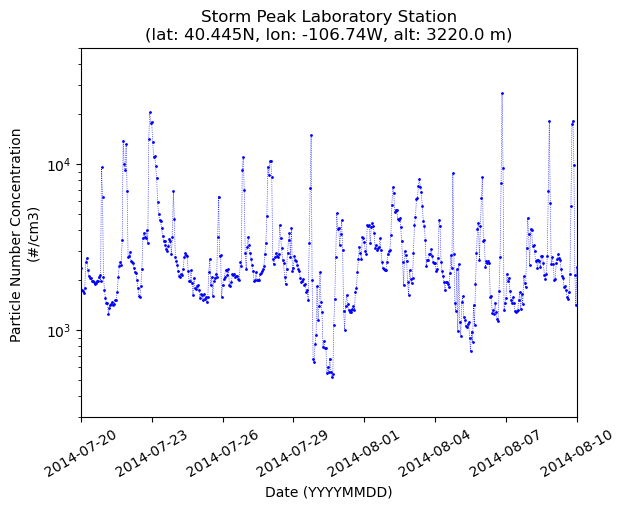

In [16]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from datetime import datetime

df = pd.read_csv('/ocean/projects/atm200005p/ding0928/nc_file_full/Storm_Peak_julaug_2014.nas', 
                 delim_whitespace=True, 
                 skiprows=74, 
                 error_bad_lines=False)
ref_date = pd.to_datetime('2014-01-01')     # print(ref_date) #2014-01-01 00:00:00
df['date'] = ref_date + pd.to_timedelta(df['starttime'], unit='D')
print(pd.to_timedelta(df['starttime'], unit='D'))
print('df[date]',df['date'])
daily_mean = df.groupby(df['date'].dt.date).mean()['particle_number_concentration']
print('daily_mean',daily_mean)

fig, ax = plt.subplots()
ax.plot(df['date'], df['particle_number_concentration'], 'bo', markersize=1.0)
ax.plot(df['date'], df['particle_number_concentration'], ':', color='blue', linewidth=0.5)
ax.set_xlabel('Date (YYYYMMDD)')
ax.set_ylabel('Particle Number Concentration \n(#/cm3)')
ax.set_title('Storm Peak Laboratory Station\n(lat: 40.445N, lon: -106.74W, alt: 3220.0 m)')

locator = mdates.DayLocator(interval=3) #2days
ax.xaxis.set_major_locator(locator)
plt.xticks(rotation=30)
ax.set_yscale('log')
ax.set_ylim([3e2, 5e4])
ax.set_xlim(pd.Timestamp('2014-07-20'), pd.Timestamp('2014-08-10'))

top3_dates_str = ['20140723', '20140722', '20140803']
top3_dates = pd.to_datetime(top3_dates_str)

for date in top3_dates:
    date_str = date.strftime('%Y-%m-%d')
    start = pd.Timestamp(date_str)
    end = start + pd.Timedelta(days=1)
    print(start, end)
    start_ordinal = start.to_pydatetime().toordinal()
    end_ordinal = end.to_pydatetime().toordinal()
    ax.axvspan(start_ordinal, end_ordinal, alpha=0.2, color='gray')
    # get the daily mean value for the shaded region
    daily_mean_val = daily_mean[date_str]
    print(daily_mean.keys())
    daily_mean.index = pd.to_datetime(daily_mean.index)
    # add an arrow showing the daily mean value
    arrow_x = pd.Timestamp(datetime.strptime(date_str, '%Y-%m-%d')) + pd.Timedelta(days=0.5)
    arrow_y = daily_mean_val + 1000
    ax.annotate('{:.2e}'.format(daily_mean_val), xy=(arrow_x, arrow_y), xytext=(arrow_x, arrow_y * 1.5), ha='center', arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.show()


In [35]:
# %load /ocean/projects/atm200005p/ding0928/script_full_nc/time_series_dask_working.py
import xarray as xr
import dask.array as da
import matplotlib.pyplot as plt
import os
import matplotlib.dates as mdates
import numpy as np
import iris
import iris.coord_systems as cs
import iris.coord_systems as coord_systems

os.environ["OPENBLAS_NUM_THREADS"] = "8"

def bbox_extract_2Dcoords(cube, bbox):
    minmax = lambda x: (np.min(x), np.max(x))
    lons = cube.coord('longitude').points 
    lats = cube.coord('latitude').points
    inregion = np.logical_and(np.logical_and(lons > bbox[0],
                                             lons < bbox[1]),
                              np.logical_and(lats > bbox[2],
                                             lats < bbox[3]))
    region_inds = np.where(inregion)
    imin, imax = minmax(region_inds[0])
    jmin, jmax = minmax(region_inds[1])
    return cube[..., imin:imax+1, jmin:jmax+1]

def add_lat_lon(cube, bbox):
    polelat = cube.coord('grid_longitude').coord_system.grid_north_pole_latitude
    polelon = cube.coord('grid_longitude').coord_system.grid_north_pole_longitude  

    source_lon = cube.coord('grid_longitude').points
    source_lat = cube.coord('grid_latitude').points
    lat2d = np.transpose(np.tile(source_lat,[len(source_lon),1]))
    lon2d = np.tile(source_lon,[len(source_lat),1])

    lons, lats = iris.analysis.cartography.unrotate_pole(lon2d, lat2d, polelon, polelat)

    longit = iris.coords.AuxCoord(lons,'longitude', units='degrees', coord_system=cs.GeogCS(6371229.0))
    latit =  iris.coords.AuxCoord(lats,'latitude', units='degrees', coord_system=cs.GeogCS(6371229.0))
    
    i_test = 1 # a label for turn-on/off 
    if i_test == 0:
        # Determine the dimensions to add the latitude and longitude coordinates
        dims = tuple(range(cube.ndim))
        for dim in ('time', 'model_level_number', 'grid_latitude', 'grid_longitude'):
            if dim in cube.dim_coords:
                dims = tuple(d for d in dims if d != cube.coord_dims(dim)[0])

    cube.add_aux_coord(longit, (2,3)) 
    cube.add_aux_coord(latit, (2,3))

    return bbox_extract_2Dcoords(cube, bbox)

def read_pt_data(potential_temperature_file, air_pressure_file, bbox):
    potential_temperature_cube = iris.load_cube(potential_temperature_file)
    air_pressure_cube = iris.load_cube(air_pressure_file)
    print(potential_temperature_cube.coord('grid_longitude').points.min(), potential_temperature_cube.coord('grid_longitude').points.max())
    print(potential_temperature_cube.coord('grid_latitude').points.min(), potential_temperature_cube.coord('grid_latitude').points.max())
    print(potential_temperature_cube.units) # K
    print(air_pressure_cube.units) #Pa

    # Add the latitude and longitude coordinates to the cubes
    potential_temperature_cube = add_lat_lon(potential_temperature_cube, bbox)
    air_pressure_cube = add_lat_lon(air_pressure_cube, bbox)
    return potential_temperature_cube, air_pressure_cube

# a subroutine to convert theta to T(k)
def convert_theta_to_temperature(potential_temperature, air_pressure):
    p0 = iris.coords.AuxCoord(100000.0, long_name='reference_pressure', units='Pa')
    Rd_cp = 287.05 / 1004.0  
    air_pressure_ratio = air_pressure/p0
    air_pressure_ratio.convert_units('1')
    temperature = potential_temperature*(air_pressure_ratio)**(Rd_cp)
    # now the T looks correct, in 280~, so I commented it out now
#     for i, temp in enumerate(temperature.data.flatten()):
#         print(f'Temperature at grid point {i+1}: {temp:.2f} K')       
    return temperature

# to convert from kg/kg to molecule cm-3
def mixing_ratio_to_number_concentration(mixing_ratio_data, air_pressure, actual_temperature):
    zboltz = 1.3807E-23  # (J/K) R = k * N_A, k=J/K, Avogadro's number (N_A)=6.022 x 1023 entities/mol.
    staird = air_pressure / (actual_temperature * zboltz * 1.0E6)  # 1.0E6 from m3 to cm3, another form of ideal gas law
    number_concentration = mixing_ratio_data * staird
    number_concentration.units = 'molecule cm-3'
    return number_concentration

#iris to process one single file
def process_single_file(filename, air_pressure, actual_temperature, bbox):
    variable_name = filename.split('/')[-1].split('_')[1:-1]
    variable_data_cube = iris.load_cube(filename, '_'.join(variable_name))
    variable_data_cube = add_lat_lon(variable_data_cube, bbox)

    number_concentration_data = mixing_ratio_to_number_concentration(variable_data_cube, air_pressure, actual_temperature)
    number_concentration_mean = number_concentration_data.collapsed(['grid_latitude', 'grid_longitude'], iris.analysis.MEAN)
    number_concentration_mean = number_concentration_mean.extract(iris.Constraint(model_level_number=2))

    time_data = variable_data_cube.coord('time')
    time_data_value = time_data.points
    return number_concentration_mean, time_data_value

# to process all the files within a loop
def process_nc_files(filenames, air_pressure, actual_temperature, bbox):
    number_concentration_mean_values = []
    time_data_values = []
    for filename in filenames:
        number_concentration_mean_value, time_data_value = process_single_file(filename, air_pressure, actual_temperature, bbox)
        number_concentration_mean_values.append(number_concentration_mean_value)
        time_data_values.append(time_data_value)
    return number_concentration_mean_values, time_data_values

def plot_data(time_data_values, number_concentration_mean_values, filenames):
    fig, axes = plt.subplots(5, 1, figsize=(6, 20), sharex=True)
    colors = ['tab:blue', 'tab:orange']
    markers = ['o', 's']
    labels = ['Binary nucleation', 'Updated ion-ternary nucleation']
    
    for i in range(5):
        print("time_data_values[i].dimension",time_data_values[i])
        print("number_concentration_mean_values[i][0].data.dimension",number_concentration_mean_values[i].data)
        axes[i].plot(time_data_values[i], number_concentration_mean_values[i].data, label=labels[0], color=colors[0], marker=markers[0], markersize=3, linewidth=1)
        axes[i].plot(time_data_values[i+5], number_concentration_mean_values[i+5].data, label=labels[1], color=colors[1], marker=markers[1], markersize=3, linewidth=1)

        variable_name = filenames[i].split('/')[-1].split('_')[8:10]
        variable_name = '_'.join(variable_name)
        title = filenames[i].split('/')[-1].split('_')[3].capitalize() + ' (' + variable_name + ')'
        axes[i].set_title(title, fontsize=14)

        axes[i].tick_params(axis='both', labelsize=12)
        axes[i].set_xlabel('Time', fontsize=12)
        axes[i].set_ylabel('#/cm3', fontsize=12)
        axes[i].legend()

    fig.suptitle('BAO tower:40.5°N, -105W', fontsize=16, fontweight='bold')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.xticks(rotation=30)
    plt.show()
    plt.savefig('BAO tower:40.5°N, -105.png')

# Now need to read in the file
path_ct706 = "/ocean/projects/atm200005p/ding0928/nc_file_full/u-ct706/full_nc_files/" #i_nuc=2
path_cs093 = "/ocean/projects/atm200005p/ding0928/nc_file_full/u-cs093/full_nc_files/" #i_nuc=4

filenames = [
    path_ct706 + 'Rgn_number_of_particles_per_air_molecule_of_insoluble_aitken_mode_aerosol_in_air_m01s34i119.nc',
    path_ct706 + 'Rgn_number_of_particles_per_air_molecule_of_soluble_accumulation_mode_aerosol_in_air_m01s34i107.nc',
    path_ct706 + 'Rgn_number_of_particles_per_air_molecule_of_soluble_aitken_mode_aerosol_in_air_m01s34i103.nc',
    path_ct706 + 'Rgn_number_of_particles_per_air_molecule_of_soluble_coarse_mode_aerosol_in_air_m01s34i113.nc',
    path_ct706 + 'Rgn_number_of_particles_per_air_molecule_of_soluble_nucleation_mode_aerosol_in_air_m01s34i101.nc',
    path_cs093 + 'Rgn_number_of_particles_per_air_molecule_of_insoluble_aitken_mode_aerosol_in_air_m01s34i119.nc',
    path_cs093 + 'Rgn_number_of_particles_per_air_molecule_of_soluble_accumulation_mode_aerosol_in_air_m01s34i107.nc',
    path_cs093 + 'Rgn_number_of_particles_per_air_molecule_of_soluble_aitken_mode_aerosol_in_air_m01s34i103.nc',
    path_cs093 + 'Rgn_number_of_particles_per_air_molecule_of_soluble_coarse_mode_aerosol_in_air_m01s34i113.nc',
    path_cs093 + 'Rgn_number_of_particles_per_air_molecule_of_soluble_nucleation_mode_aerosol_in_air_m01s34i101.nc'
]

potential_temperature_file_ct706 = path_ct706 + 'Rgn_air_potential_temperature_m01s00i004.nc'
air_pressure_file_ct706 = path_ct706 + 'Rgn_air_pressure_m01s00i408.nc'

potential_temperature_file_cs093 = path_cs093 + 'Rgn_air_potential_temperature_m01s00i004.nc'
air_pressure_file_cs093 = path_cs093 + 'Rgn_air_pressure_m01s00i408.nc'

# Define the bounding box (in degrees) for the area of interest
bbox = [-105, -104.5, 40.4, 40.8] #BAO tower, low altitude
#bbox = [-107, -106.5, 40.5, 40.8] #Storm Peak Lab:40.45° N, 106.6°  wester-high-altitude
potential_temperature_ct706, air_pressure_ct706 = read_pt_data(potential_temperature_file_ct706, air_pressure_file_ct706, bbox)
actual_temperature_ct706 = convert_theta_to_temperature(potential_temperature_ct706, air_pressure_ct706)

potential_temperature_cs093, air_pressure_cs093 = read_pt_data(potential_temperature_file_cs093, air_pressure_file_cs093, bbox)
actual_temperature_cs093 = convert_theta_to_temperature(potential_temperature_cs093, air_pressure_cs093)

number_concentration_mean_values_ct706, time_data_values_ct706 = process_nc_files(filenames[:5], air_pressure_ct706, actual_temperature_ct706, bbox)
number_concentration_mean_values_cs093, time_data_values_cs093 = process_nc_files(filenames[5:], air_pressure_cs093, actual_temperature_cs093, bbox)
number_concentration_mean_values = number_concentration_mean_values_ct706 + number_concentration_mean_values_cs093
time_data_values = time_data_values_ct706 + time_data_values_cs093

plot_data(time_data_values, number_concentration_mean_values, filenames[:5] + filenames[5:])



/tmp/ipykernel_2236702/57296009.py:55: FutureWarning: Ignoring a datum in netCDF load for consistency with existing behaviour. In a future version of Iris, this datum will be applied. To apply the datum when loading, use the iris.FUTURE.datum_support flag.
  potential_temperature_cube = iris.load_cube(potential_temperature_file)
/tmp/ipykernel_2236702/57296009.py:56: FutureWarning: Ignoring a datum in netCDF load for consistency with existing behaviour. In a future version of Iris, this datum will be applied. To apply the datum when loading, use the iris.FUTURE.datum_support flag.
  air_pressure_cube = iris.load_cube(air_pressure_file)


357.273 362.673
-2.727 2.673
K
Pa


/tmp/ipykernel_2236702/57296009.py:55: FutureWarning: Ignoring a datum in netCDF load for consistency with existing behaviour. In a future version of Iris, this datum will be applied. To apply the datum when loading, use the iris.FUTURE.datum_support flag.
  potential_temperature_cube = iris.load_cube(potential_temperature_file)
/tmp/ipykernel_2236702/57296009.py:56: FutureWarning: Ignoring a datum in netCDF load for consistency with existing behaviour. In a future version of Iris, this datum will be applied. To apply the datum when loading, use the iris.FUTURE.datum_support flag.
  air_pressure_cube = iris.load_cube(air_pressure_file)


357.273 362.673
-2.727 2.673
K
Pa


/tmp/ipykernel_2236702/57296009.py:90: FutureWarning: Ignoring a datum in netCDF load for consistency with existing behaviour. In a future version of Iris, this datum will be applied. To apply the datum when loading, use the iris.FUTURE.datum_support flag.
  variable_data_cube = iris.load_cube(filename, '_'.join(variable_name))
/jet/home/ding0928/.conda/envs/iris_3.9_vscode/lib/python3.9/site-packages/iris/cube.py:3817: UserWarning: Collapsing spatial coordinate 'grid_latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/jet/home/ding0928/.conda/envs/iris_3.9_vscode/lib/python3.9/site-packages/iris/coords.py:2226: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'grid_latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'grid_latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/jet/home/ding0928/.conda/envs/iris_3.9_vscode/lib/pyt

time_data_values[i].dimension [390505. 390508. 390511. 390514. 390517. 390520. 390523. 390526. 390529.
 390532. 390535. 390538. 390541. 390544. 390547. 390550. 390553. 390556.
 390559. 390562. 390565. 390568. 390571. 390574. 390577. 390580. 390583.
 390586. 390589. 390592. 390595. 390598. 390601. 390604. 390607. 390610.
 390613. 390616. 390619. 390622. 390625. 390628. 390631. 390634. 390637.
 390640. 390643. 390646. 390649. 390652. 390655. 390658. 390661. 390664.
 390667. 390670. 390673. 390676. 390679. 390682. 390685. 390688. 390691.
 390694. 390697. 390700. 390703. 390706. 390709. 390712. 390715. 390718.
 390721. 390724. 390727. 390730. 390733. 390736. 390739. 390742. 390745.
 390748. 390751. 390754. 390757. 390760. 390763. 390766. 390769. 390772.
 390775. 390778. 390781. 390784. 390787. 390790. 390793. 390796. 390799.
 390802. 390805. 390808. 390811. 390814. 390817. 390820. 390823. 390826.
 390829. 390832. 390835. 390838. 390841. 390844. 390847. 390850. 390853.
 390856. 390859. 3908